#### importando as bibliotecas necessárias

In [2]:
# importando as bibliotecas necessárias
import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
import re
import numpy as np
from collections import Counter

# Make the graphs prettier
pd.set_option('display.mpl_style', 'default')


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## passando os tokens de autenticação

In [14]:

consumer_key= 'KHtfW79vutKqJukwkoV2V35Jf'
consumer_secret= '2jMz3vY40Rtxr1VoRhNEJ3eQcdRh5dgJejzTNOlkWZAW2uW2ie'

access_token='1384143624-4fmD9qlAhqvoHptqgr3NqVTLcfZ2r8oPLLmJPyS'
access_token_secret='ikQh84FZr9LkBiwvkOUjsIIjVhZwEwxVbS7Yrcz13g9rw'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)
public_tweets = api.search('crs_macedo')

In [15]:
# Pesquisando por uma query específica
result = api.search(q='%23JBS') #%23 é usado para '#'
# Tipo do resultado
type(result)

In [4]:
tweet = result[0] 
for param in dir(tweet):
    if not param.startswith("_"):
        print ("%s : %s\n" % (param, eval('tweet.'+param)))
               

author : User(following=False, favourites_count=51, location='Porto Alegre', profile_background_tile=False, follow_request_sent=False, profile_use_background_image=True, profile_sidebar_fill_color='DDEEF6', verified=False, description='', is_translator=False, notifications=False, profile_background_color='C0DEED', name='Jornal O Sul', id=3245657679, default_profile=True, is_translation_enabled=False, id_str='3245657679', utc_offset=None, profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png', friends_count=4109, has_extended_profile=False, default_profile_image=False, time_zone=None, _api=<tweepy.api.API object at 0x7fbc7f01a5f8>, contributors_enabled=False, profile_image_url='http://pbs.twimg.com/profile_images/597579013536796672/_-55eQqe_normal.jpg', profile_image_url_https='https://pbs.twimg.com/profile_images/597579013536796672/_-55eQqe_normal.jpg', listed_count=79, protected=False, profile_background_image_url_https='https://abs.twimg.com/images/themes/the

# Agora vamos inserir a(s) palavra(s) que queremos buscar no Twitter para fazer as análises
## Pegaremos como exemplo os primeiros 2000 itens baseados na query de pesquisa

In [16]:
results = []
for tweet in tweepy.Cursor(api.search, q='%23ThorRagnarok').items(2000):
    results.append(tweet)

# Verificando o número de itens retornados
print (len(results))

### Com essa função geramos o csv com os atributos que queremos

In [112]:
def toDataFrame(tweets):
    
    DataSet = pd.DataFrame()
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]

    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]
    return DataSet

# Passando a lista de tweet e criando um Dataframe
DataSet = toDataFrame(results)

In [114]:
# aqui vemos os últimos 2 twiters
DataSet.tail(2)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
1998,931181513336528897,RT @HiddlesPage: #Thor #Loki\n#TomHiddleston #...,695,0,Twitter for iPhone,2017-11-16 15:25:47,973332006,I_am_TomCruise,チンコ丸出し丸,2012-11-27 05:54:28,パディントン,1422,349,,None
1999,931181491115233281,Es IMPOSIBLE que #JusticeLeague tenga 43% en e...,0,2,Twitter Web Client,2017-11-16 15:25:42,33737491,PeterMunoz_,★El Peter★,2009-04-21 00:35:48,"Went to hell and back, forged in fire, always ...",696,598,,Pacific Time (US & Canada)


# 'None' é tratado como 'NULO' aqui, então iremos remover todas as ocorrências de 'None' na coluna 'userTimezone' 

In [115]:
DataSet = DataSet[DataSet.userTimezone.notnull()]

#### Contando os número de tweets em cada time zone e observando as primeiras 10

In [116]:
tzs = DataSet['userTimezone'].value_counts()[:10]
print (tzs)


Pacific Time (US & Canada)    307
Bangkok                       136
Eastern Time (US & Canada)     87
Central Time (US & Canada)     58
Hanoi                          55
Jakarta                        52
London                         38
Tokyo                          37
Madrid                         26
Brasilia                       24
Name: userTimezone, dtype: int64


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


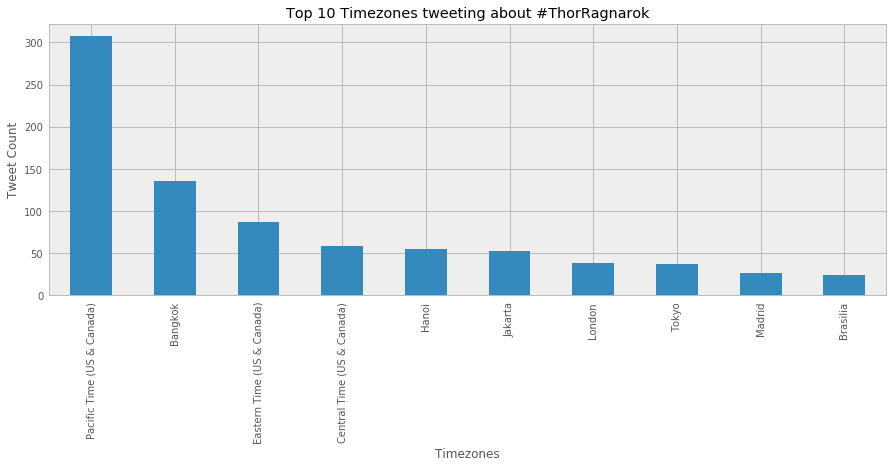

In [117]:
# Criando um gráfico de barrra com tamanho específico
plt.rcParams['figure.figsize'] = (15, 5)

# Plotando o Time Zone como gráfico de barras
tzs.plot(kind='bar')


# Setando título, legenda
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about #ThorRagnarok')


In [70]:
# testando a análise de sentimento par uma pesquisa com a #ThorRagnarok
for tweet in tweepy.Cursor(api.search,
    q="#ThorRagnarok",
    count=2000,
    result_type="recent",
    include_entities=True,
    lang="en").items():
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment) # imprime o sentimento e objetividade de cada twitter
print("")


RT @lovkscreenz: ✧ loki &amp; thor ( #thorki from #ThorRagnarok) lockscreens https://t.co/2XtaSTZYw9
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Marvel: The best of friends. #ThorRagnarok is now playing! Get tickets: https://t.co/3WKtgYAp6T https://t.co/6eAONTTpER
Sentiment(polarity=1.0, subjectivity=0.3)
RT @prgifs: So #ThorRagnarok was a good time https://t.co/A7aUtd5uUm
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
RT @RegalMovies: FOLLOW us &amp; RT for a chance to win this #ThorRagnarok @IMAX exclusive poster signed by the cast! Get #IMAX tickets: https:…
Sentiment(polarity=1.0, subjectivity=0.4)
RT @thorofficial: “Want to see what true power really looks like?” Watch a special look at #ThorRagnarok! Get tickets now: https://t.co/AZA…
Sentiment(polarity=0.33214285714285713, subjectivity=0.47380952380952385)
RT @ComicBook: ICYMI: #ThorRagnarok Crosses $500 Million Worldwide https://t.co/9oRHPLtLyW https://t.co/XcmzLbqlcz
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Co

TweepError: Twitter error response: status code = 429

## geramos um csv com o Dataset para que possamos consultar para gerar análises sem necessidade de obter novos twitters


In [12]:
DataSet.to_csv('thorRagnarok.csv', index=False) # index=False indica que não será criado uma coluna extra com os índices de cada linha
DataSet.columns # vendo as colunas do csv

Index(['tweetID', 'tweetText', 'tweetRetweetCt', 'tweetFavoriteCt',
       'tweetSource', 'tweetCreated', 'userID', 'userScreen', 'userName',
       'userCreateDt', 'userDesc', 'userFollowerCt', 'userFriendsCt',
       'userLocation', 'userTimezone'],
      dtype='object')

In [130]:
# Colocando os twiters  em uma lista
listaTextoT = DataSet['tweetText'].tolist() # transformando a coluna no csv que possui os twittes em lista

#### stop words (palavras que uma vez estando nos twiters serão excluídas pois são irrelevantes para as análises)

In [20]:
cached_stop_words = ['            ','             ','              ','           ','     ', '    ', ' ', '  ', '   ', '      ', '       ', '        ', '         ', '          ',"i","neutral", "thorragnarok","negative","positive","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into", "through", "during","before", "after","above", "below","to", "from","up", "down","in","out","on","off","over","under","again","further",
"then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now","d","ll","m","o","re","ve","y","ain","aren","couldn","didn","doesn","hadn","hasn","haven","isn","ma","mightn","mustn","needn","shan","shouldn","wasn","weren","won","wouldn","de","a","o","que","e","do","da","em","um","para","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","ao","ele","das","à","seu","sua","ou","quando","muito","nos","já","eu","também","só","pelo","pela","até","isso","ela","entre","depois","sem","mesmo","aos","seus","quem","nas","me","esse","eles","você","essa","num","nem","suas","meu","às","minha","numa","pelos","elas","qual","nós","lhe","deles","essas","esses","pelas","este","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estam","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos",
"são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","55","55555", "a", "e", "i", "o", "u", "555555","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","55555555", "http", "https","50", "8","teríamos", "sentiment", "text", "user", "twitter","teriam" ]


In [164]:
#  Função para limpar os twiters
word_L = [] # lista com todos os twiters
def clean_tweet3():
    for tweet in listaTextoT:
        for word in str(tweet).split():
            word = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", word)
            word = re.sub('^u\'','',word)
            word = re.sub('\'','',word)
            word = re.sub(' ','',word)
            word = word.lower()
            if len(word) > 3:
                if str(word) not in cached_stop_words:
                    word_L.append(word)
print(clean_tweet3()) # aplicando a limpeza 

None


In [165]:
len(word_L)  #observando o número de palavras na lista de twiters

8201

In [141]:
DataSet.shape

(1210, 15)

In [166]:
# Fazendo duas listas do tamanho do coleta
par = [] # Separando listas com índices pares
impar = [] # Separando listas com índices ímpares
for i in range(8201):
    if i %2==0:
        par.append(i)
    else:
        impar.append(i)

In [159]:
col = ['palavras']  # geramos um csv com todas as palavras
proGenphi =pd.DataFrame(word_L, columns=col)
proGenphi.to_csv('nova_palavraThor.csv', index=False)

In [160]:
# criamos 2 csvs com as palavras ímpares e pares para que cada coluna sirva de aresta para o grau
# exemplo
# palavra 1 palavra 2
# palavra 3 palavra 4

colPar = ['palavras']
colImpar = ['palavras']
p = proGenphi.ix[par]
i = proGenphi.ix[impar]
csvPar =pd.DataFrame(p, columns=colPar)
csvImpar =pd.DataFrame(i, columns=colImpar)

csvPar.to_csv('parGenphiThor.csv', index=False)
csvImpar.to_csv('imparGenphiThor.csv', index=False)

In [161]:
leitorProGenphiPar = pd.read_csv('parGenphiThor.csv')       # lendo o arquivo com as palavras pares 
leitorProGenphiImpar = pd.read_csv('imparGenphiThor.csv')   # lendo o arquivo com as palavras ímpares

In [114]:
# leitorProGenphiImpar

#### Precisamos apenas gerar os sentimentos e subjetividade para cada twiter uma única vez, depois geramos um csv e para nossas análises. Leremos esse csv sem ter que fazer todo processo acima  mais de uma vez.


In [21]:

dfThor = pd.read_csv('thorRagnarok.csv') # lendo o csv
dfThor['sentimento'] = ' '
dfThor['subjetividade'] = ' '
# dfThor.columns

##### removendo twitters nulos 

In [22]:
dfThor.dropna(subset=['tweetText'], how='all', inplace = True) 

## Logo abaixo você poderá acompanhar um exemplo de cálculo de sentimento para o primeiro twitter coletado.
#### A propriedade de sentiment returna uma tupla da forma (polarity, subjectivity). O polarity score é um numero float entre [-1.0, 1.0]. A subjectivity é um float entre [0.0, 1.0] em que 0.0 é muito objetivo e 1.0 indica pouca objetividade no twitter, ou seja, muita subjetividade.

In [17]:

analysis = TextBlob(dfThor['tweetText'][0])
print(dfThor['tweetText'][0])
print(analysis.sentiment)

RT @Disney: The wait is finally over! #ThorRagnarok is in theaters now! https://t.co/jqJVGu2p0a
Sentiment(polarity=0.0, subjectivity=1.0)


##### Gerando as subjetividades e sentimentos para cada twitter

In [23]:
for i, row in dfThor.iterrows():
    analysis = TextBlob(dfThor['tweetText'][i])
    dfThor['sentimento'][i] = analysis.sentiment[0]
    dfThor['subjetividade'][i] = analysis.sentiment[1]    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


##### Salvando o CSV com as novas colunas e arquivos.

In [26]:
dfThor.to_csv('thorRagnarok.csv', index=False)

#### Uma vez feito todo processo acima sempre que quiser fazer novos insights, leia esse csv e retome suas análises à partir dessa parte 

In [9]:
dfThor = pd.read_csv('thorRagnarok.csv') # lendo o csv

In [3]:
dfThor.head(2) # 2 primeiros twitters

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone,sentimento,subjetividade
0,929554571126480896,RT @Disney: The wait is finally over! #ThorRag...,261.0,0,Twitter Web Client,2017-11-12 03:40:54,9.107559e+17,tigerfeng8,tigerfeng,2017-09-21 06:41:43,NaN,9.0,70.0,NaN,Pacific Time (US & Canada),0.0,1.00
1,929554561332756480,RT @Fandor: Obsessed with Valkyrie in #ThorRag...,10.0,0,Twitter for iPhone,2017-11-12 03:40:52,8.675716e+17,hollandsgard,cammy🐻,2017-05-25 02:42:35,finger lickin good,110.0,184.0,NaN,Pacific Time (US & Canada),-0.5,0.85


# Observando a quantidade de twiters por time zones e construindo um gráfico 

Pacific Time (US & Canada)      398
Jakarta                         141
Bangkok                         113
Hanoi                           103
Eastern Time (US & Canada)       90
Central Time (US & Canada)       83
Mountain Time (US & Canada)      17
Tokyo                            15
Quito                            15
Mexico City                      14
Atlantic Time (Canada)           13
Seoul                            12
Arizona                          12
Brasilia                         10
London                           10
Beijing                           9
New Delhi                         8
Novosibirsk                       8
Hawaii                            8
Buenos Aires                      7
Amsterdam                         6
Kuala Lumpur                      6
Monterrey                         6
Santiago                          5
Hong Kong                         5
Singapore                         5
Alaska                            5
Chennai                     

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


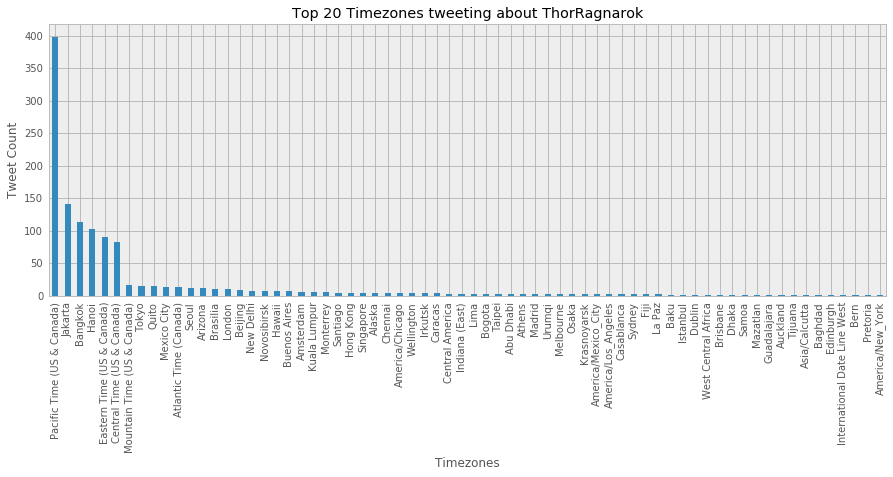

In [22]:
dfThor = dfThor[dfThor.userTimezone.notnull()]

tzs = dfThor['userTimezone'].value_counts()[:10]
print (tzs)

plt.rcParams['figure.figsize'] = (15, 5)

# Plotando um gráfico de barras com os dados das Time Zones
tzs.plot(kind='bar')

#  Acrescentando legendas ao gráfico
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 20 Timezones tweeting about ThorRagnarok')


# Calculando o sentimento médio para cada País 

In [5]:
x = dfThor.groupby(dfThor['userTimezone'])
x['sentimento'].agg( [np.count_nonzero,np.mean, np.std, np.sum] ).sort_values('mean', ascending=False)


,count_nonzero,mean,std,sum
userTimezone,,,,
Edinburgh,1.0,0.900000,NaN,0.900000
Samoa,1.0,0.700000,NaN,0.700000
Pretoria,1.0,0.500000,NaN,0.500000
Madrid,2.0,0.425000,0.452079,1.275000
Krasnoyarsk,1.0,0.390625,0.552427,0.781250
Wellington,3.0,0.384062,0.437484,1.920312
America/New_York,1.0,0.379167,NaN,0.379167
Auckland,1.0,0.350000,NaN,0.350000
Asia/Calcutta,1.0,0.318182,NaN,0.318182


## Montando um gráfico com o sentimento médio das 10 principais time zones.
### Pacific Time (US & Canada), Jakarta, Eastern Time (US & Canada), Central Time (US & Canada),Hanoi, Quito, Bangkok, Seoul, Mountain Time (US & Canada, London

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


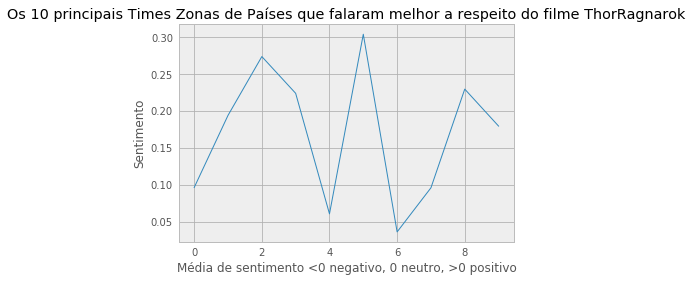

In [9]:
plt.ylabel('Sentimento')
plt.xlabel('Média de sentimento <0 negativo, 0 neutro, >0 positivo')
plt.title('Os 10 principais Times Zonas de Países que falaram melhor a respeito do filme ThorRagnarok')
plt.plot([0.096584, 0.194297,0.273926,0.224138,0.060847, 0.304167,0.036389,0.096133,0.229832,0.179754 ])

## Calculando a subjetividde para os Países com maior quantidade de twitters coletados. 
### Pacific Time (US & Canada), Jakarta, Eastern Time (US & Canada), Central Time (US & Canada),Hanoi, Quito, Bangkok, Seoul, Mountain Time (US & Canada, London

In [50]:
y = dfThor.groupby(dfThor['userTimezone'])
y['subjetividade'].agg( [np.count_nonzero,np.mean, np.std, np.sum] ).sort_values('count_nonzero', ascending=False)


,count_nonzero,mean,std,sum
userTimezone,,,,
Pacific Time (US & Canada),121.0,0.169839,0.293865,67.595844
Eastern Time (US & Canada),60.0,0.398036,0.335266,35.823201
Jakarta,58.0,0.224258,0.309418,31.620357
Central Time (US & Canada),43.0,0.312865,0.354231,25.967758
Hanoi,20.0,0.100653,0.240522,10.367262
Bangkok,16.0,0.054899,0.175954,6.203571
Quito,11.0,0.418657,0.293230,6.279861
Mountain Time (US & Canada),7.0,0.188329,0.239466,3.201587
Seoul,7.0,0.276405,0.264112,3.316856


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


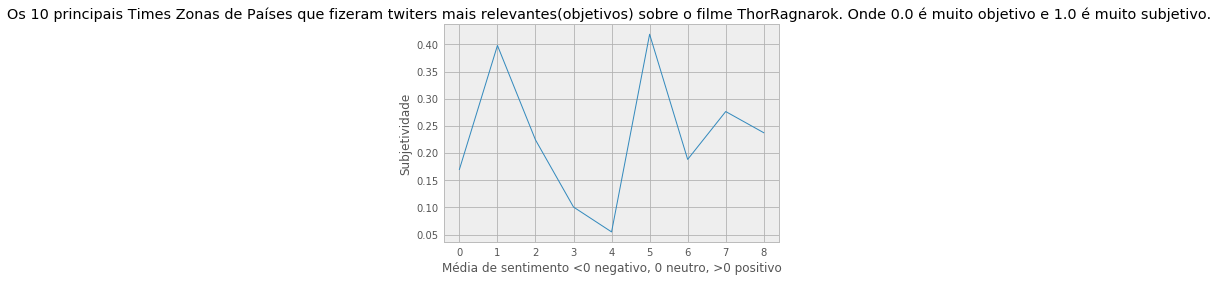

In [10]:
plt.ylabel('Subjetividade')
plt.xlabel('Média de sentimento <0 negativo, 0 neutro, >0 positivo')
plt.title('Os 10 principais Times Zonas de Países que fizeram twiters mais relevantes(objetivos) sobre o filme ThorRagnarok. Onde 0.0 é muito objetivo e 1.0 é muito subjetivo. ')
plt.plot([0.169839,0.398036,0.224258,0.100653,0.054899,0.418657,0.188329,0.276405,0.237443 ])

# Exibindo um gráfico de pizza com o sentimento médio em todas as time zones

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


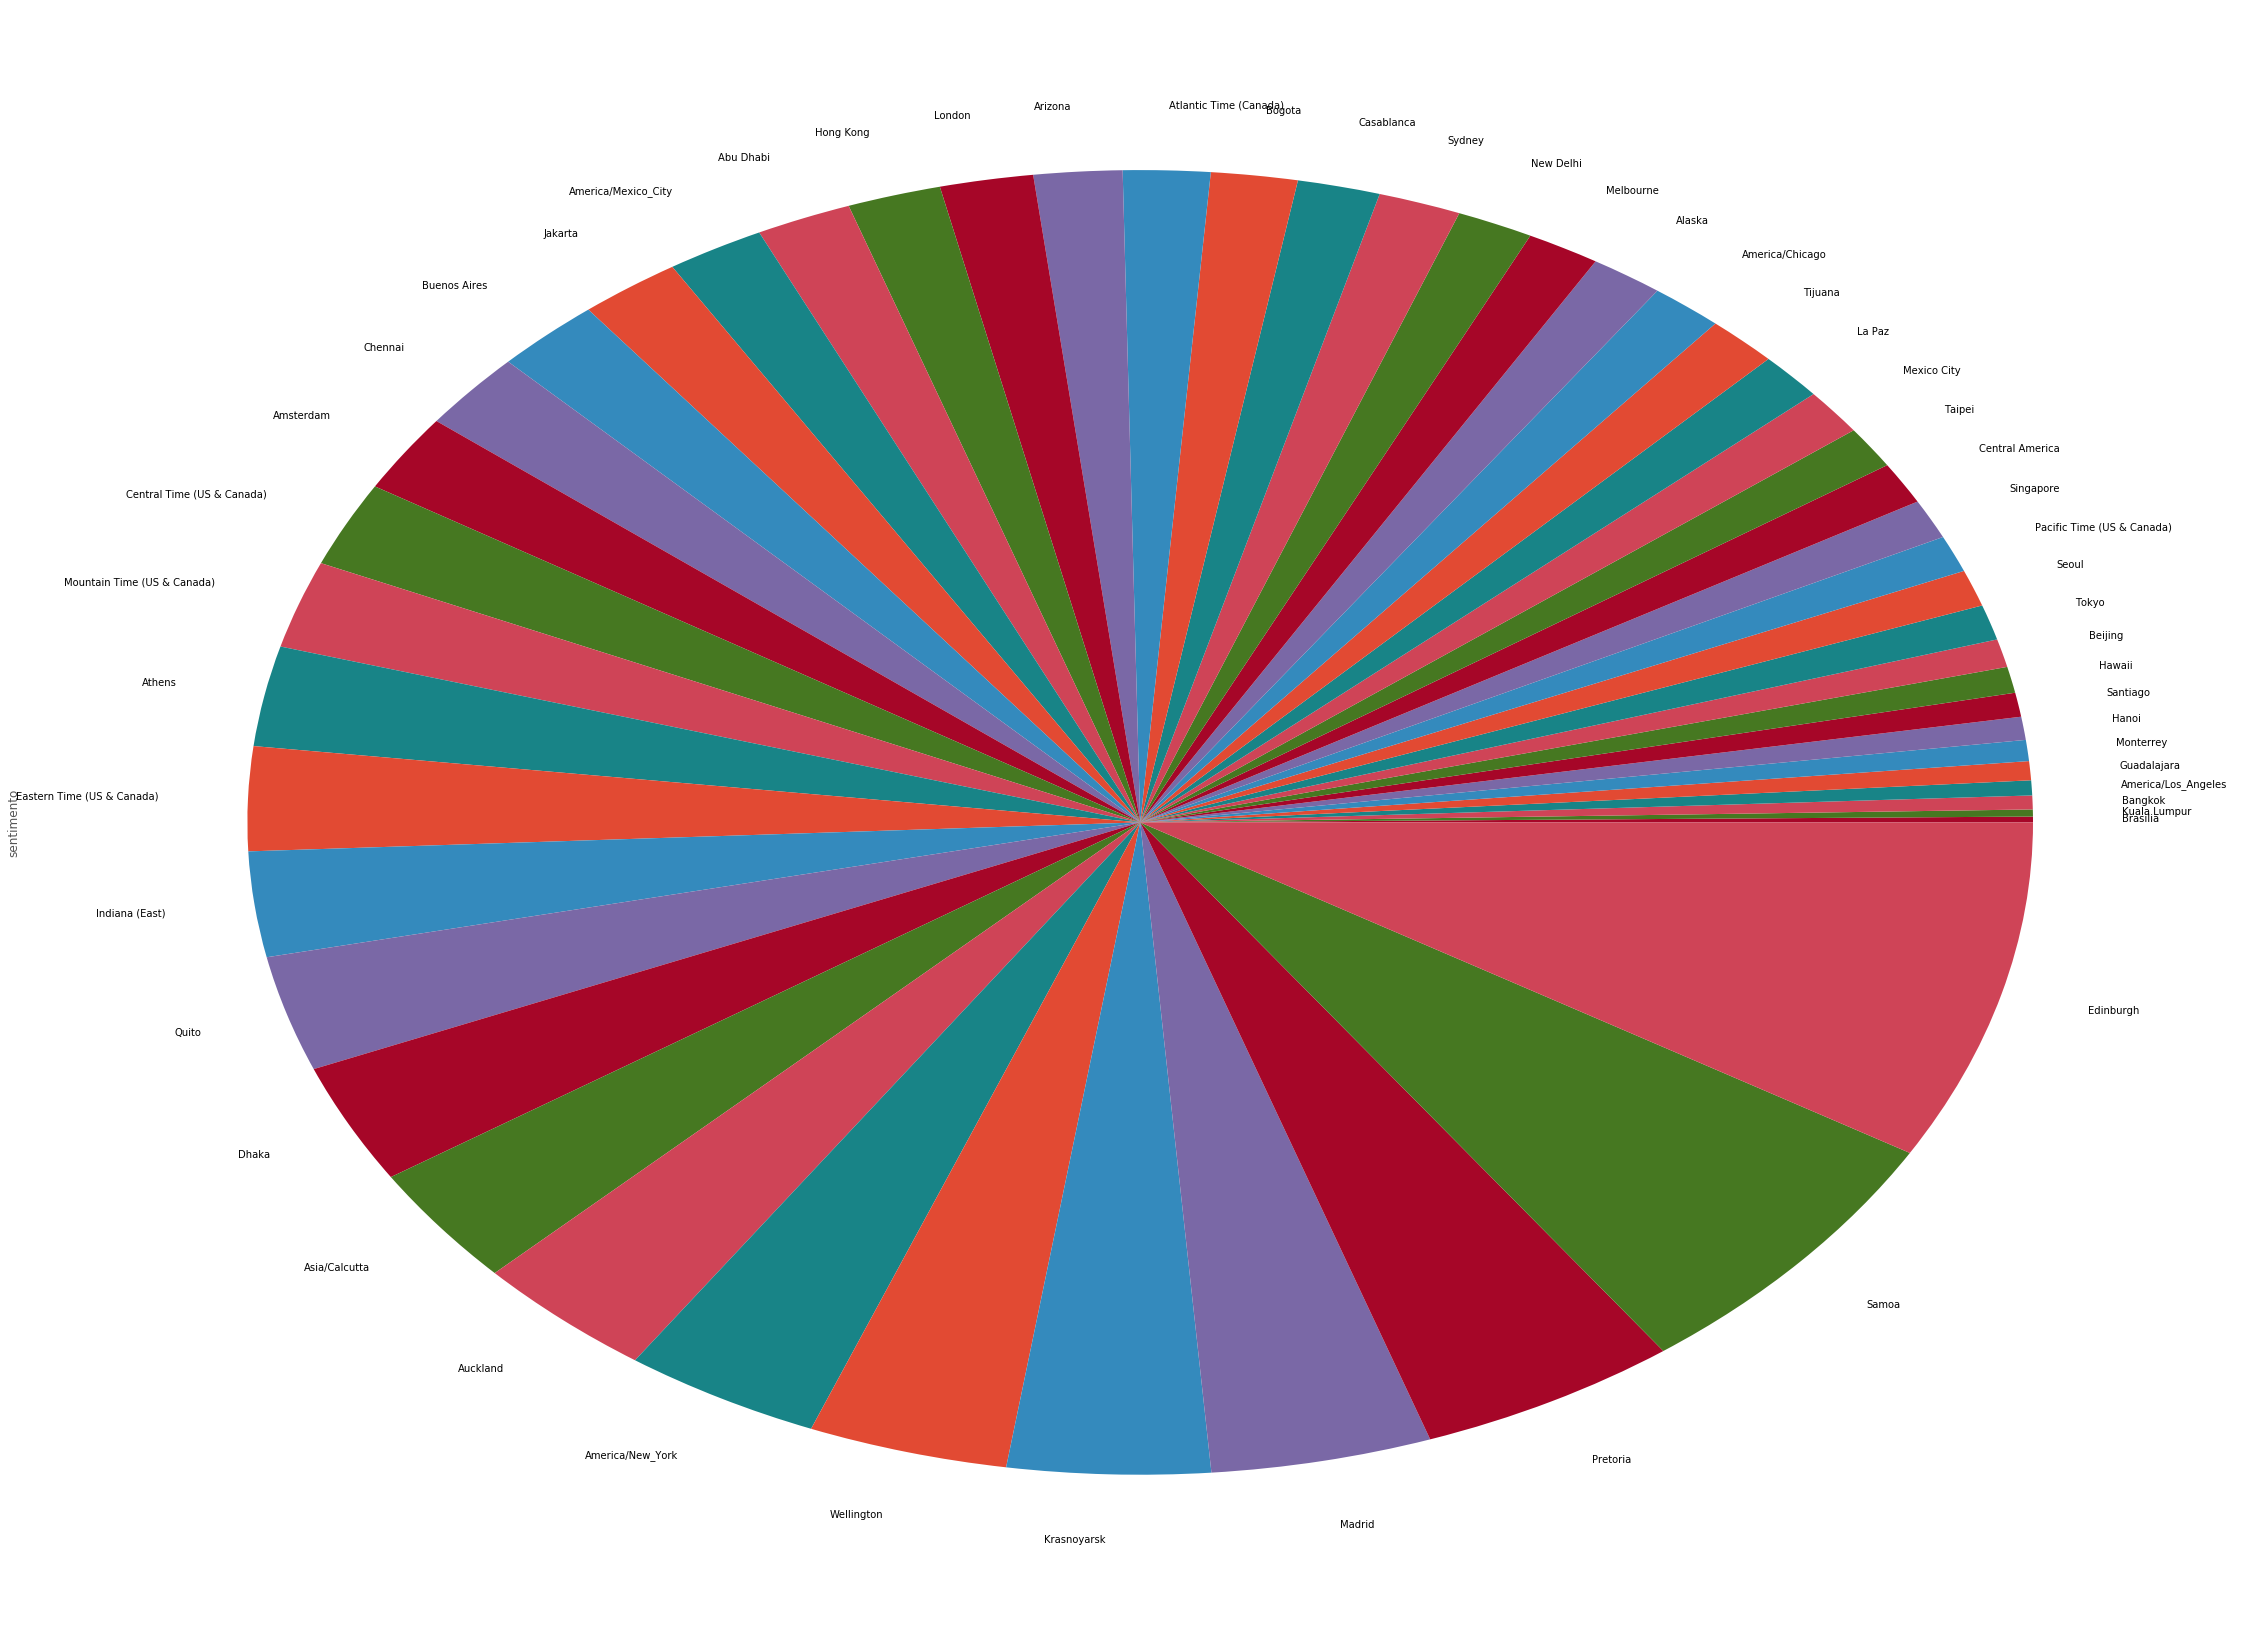

In [52]:
x[u'sentimento'].mean().sort_values().plot(kind='bar', figsize=(40,30))

# Exibindo um gráfico de barra com o sentimento médio em todas as time zones

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


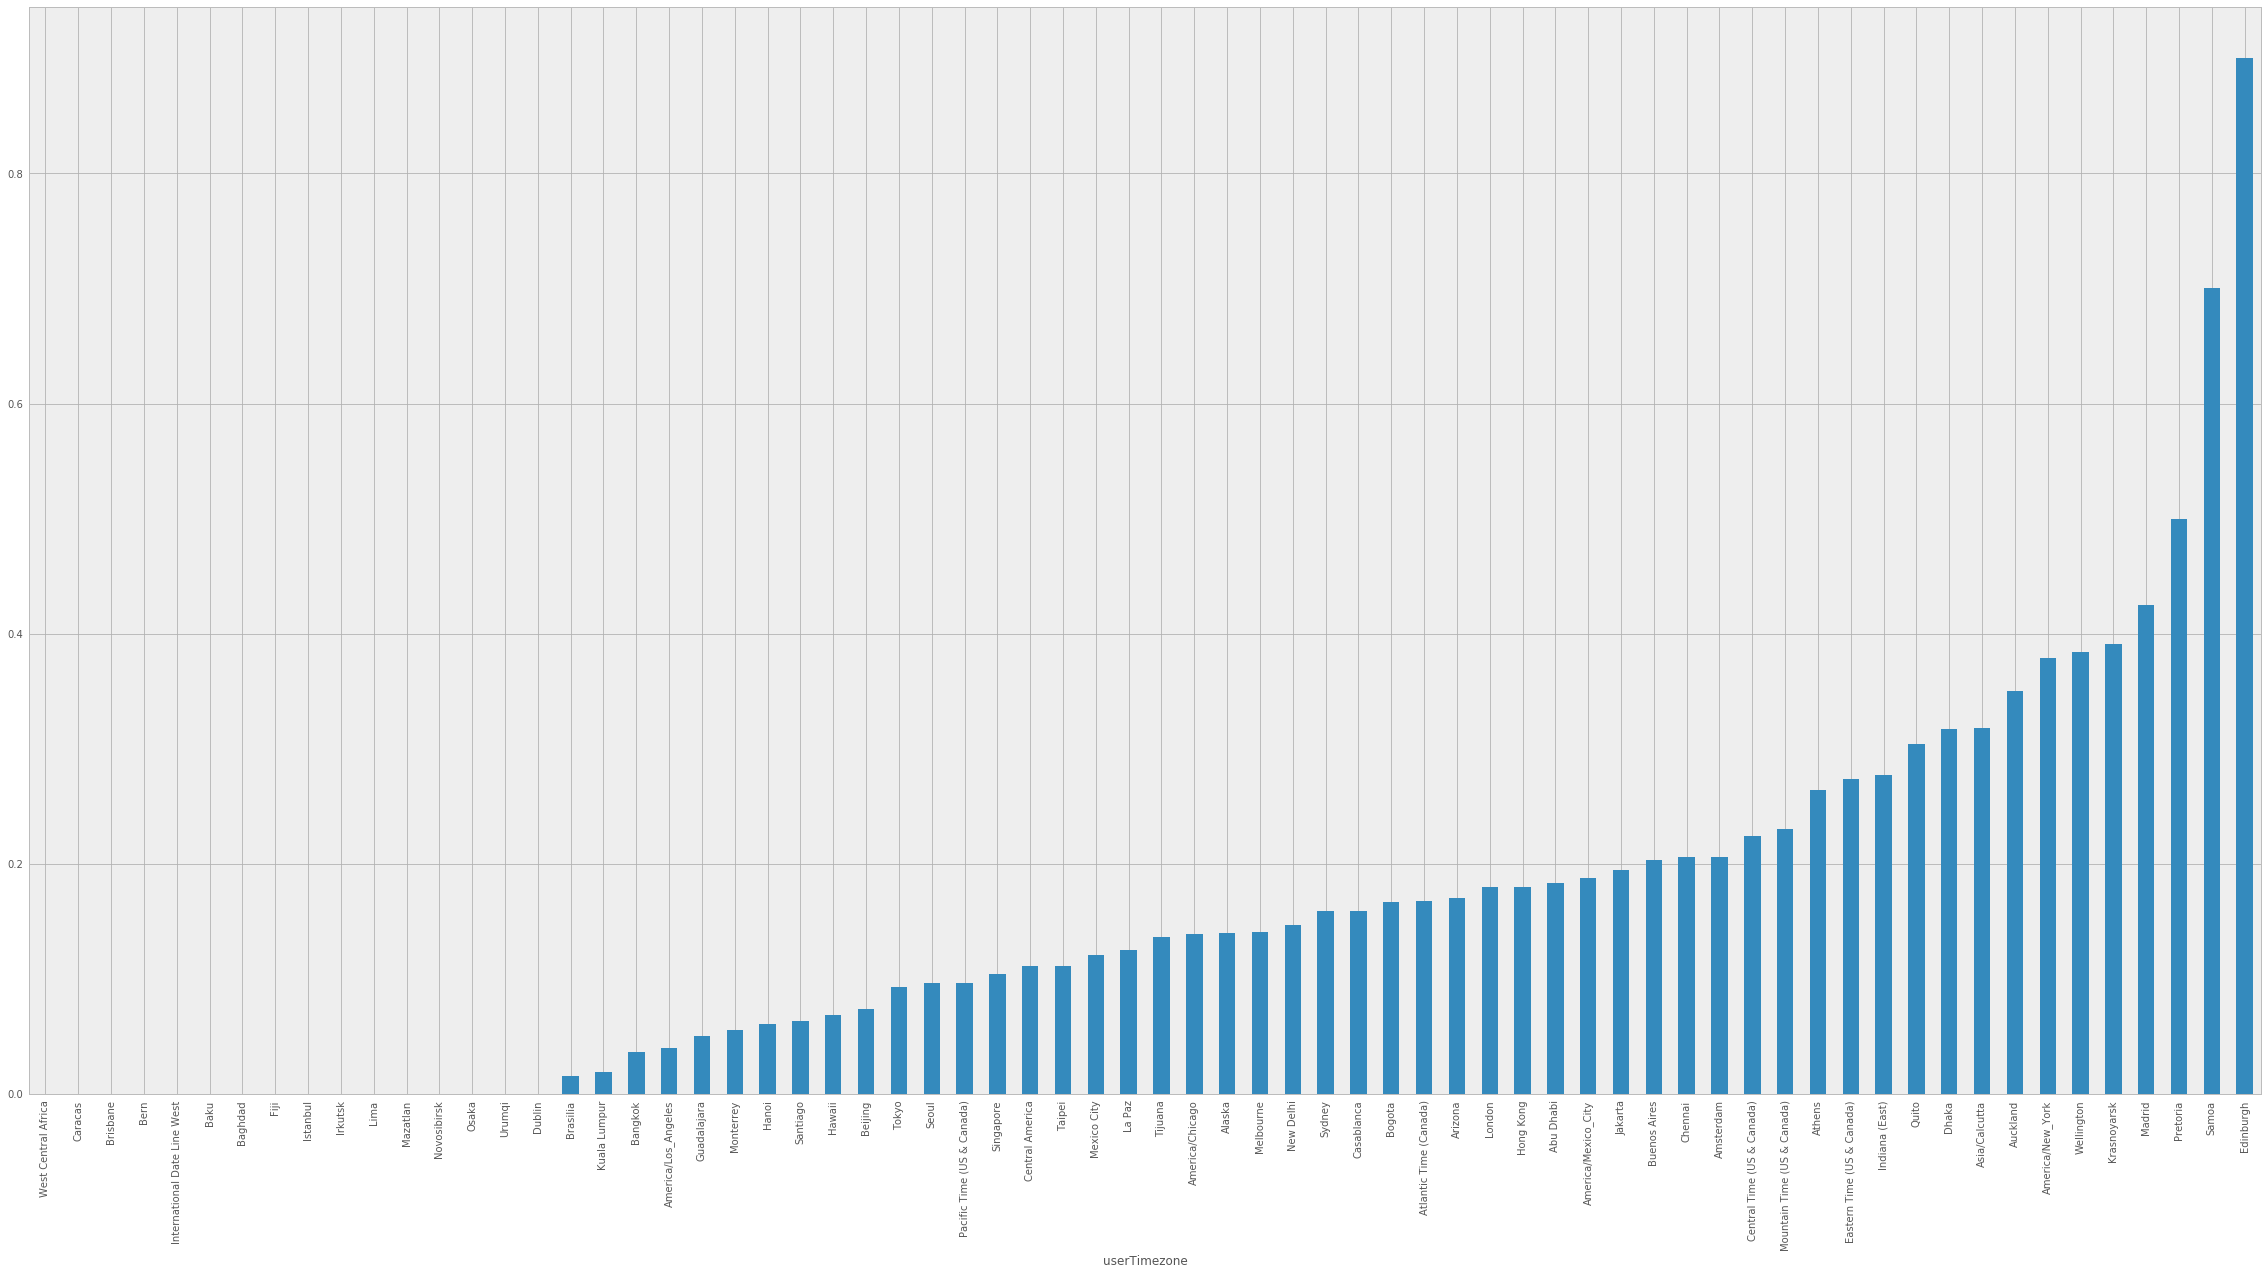

In [12]:
x[u'sentimento'].mean().sort_values().plot(kind='bar', figsize=(40,20))

# Exibindo uma série temporal com o sentimento médio em todas as time zones

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


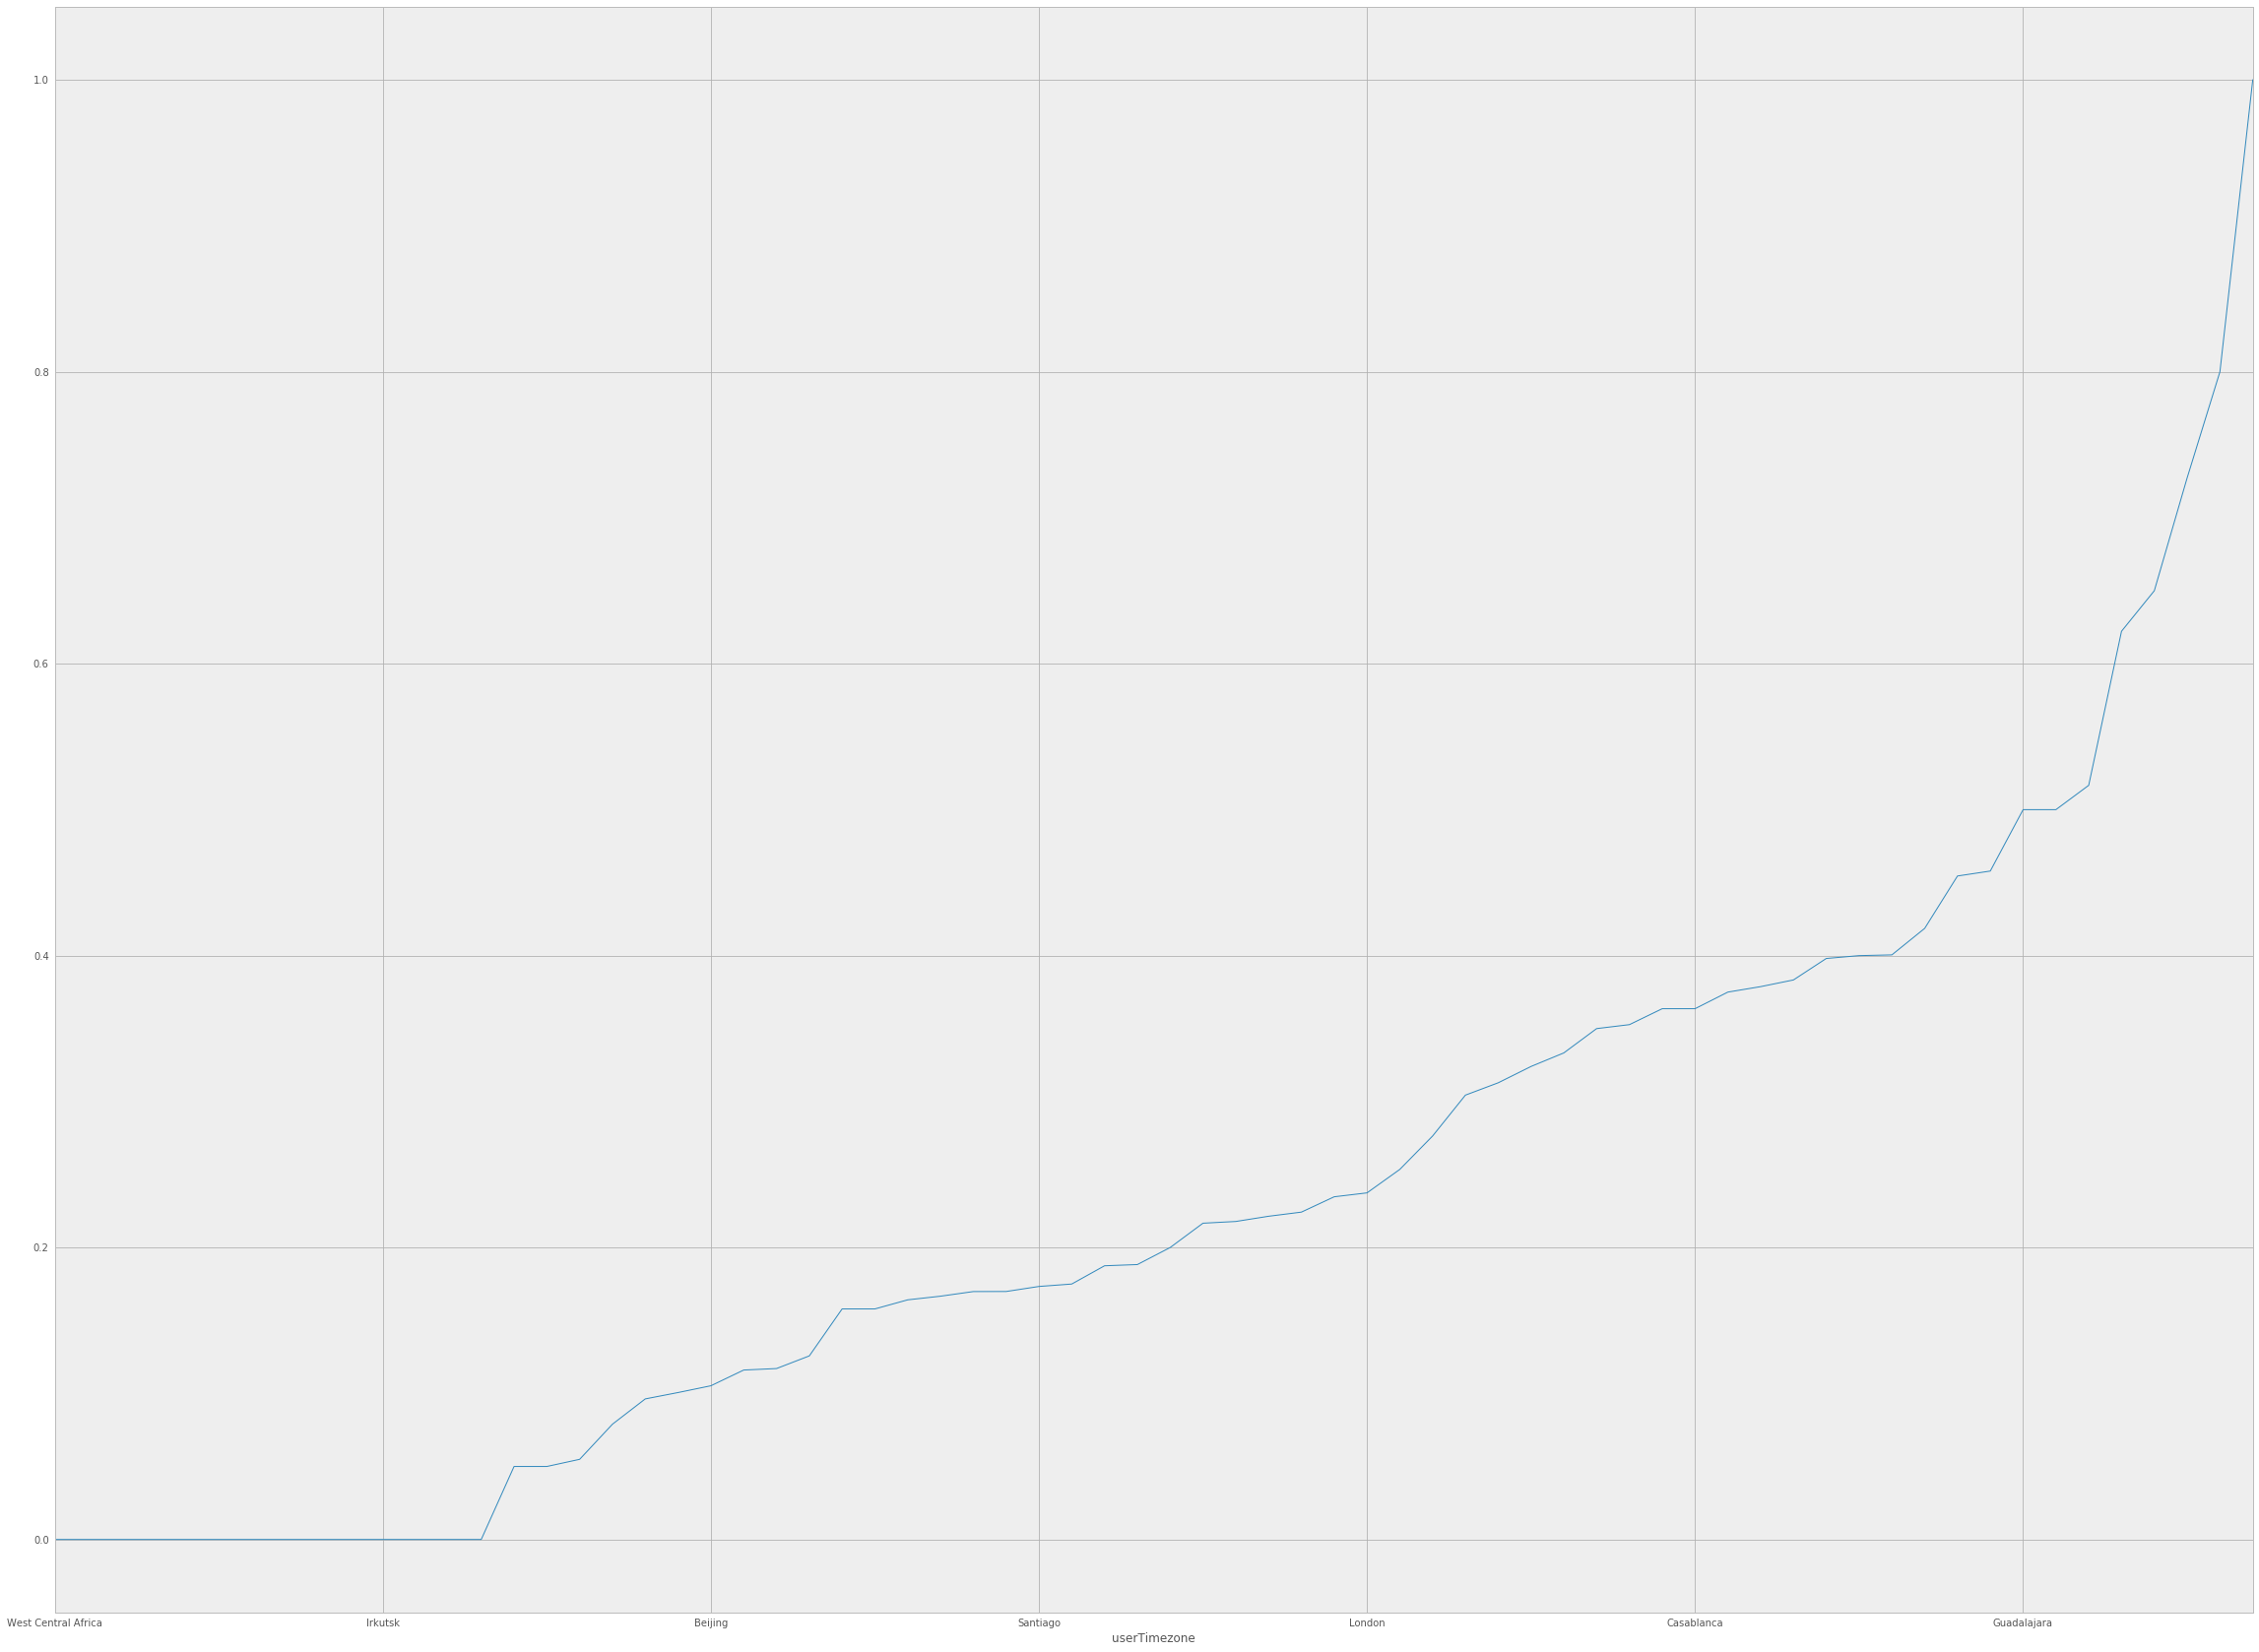

In [13]:
x[u'subjetividade'].mean().sort_values().plot(kind='line', figsize=(40,30))


# Vamos fazer o mesmo para a subjetividade
## Logo abaixo temos um gráfico que mostra todas as subjetvidades de todas as time zones 

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


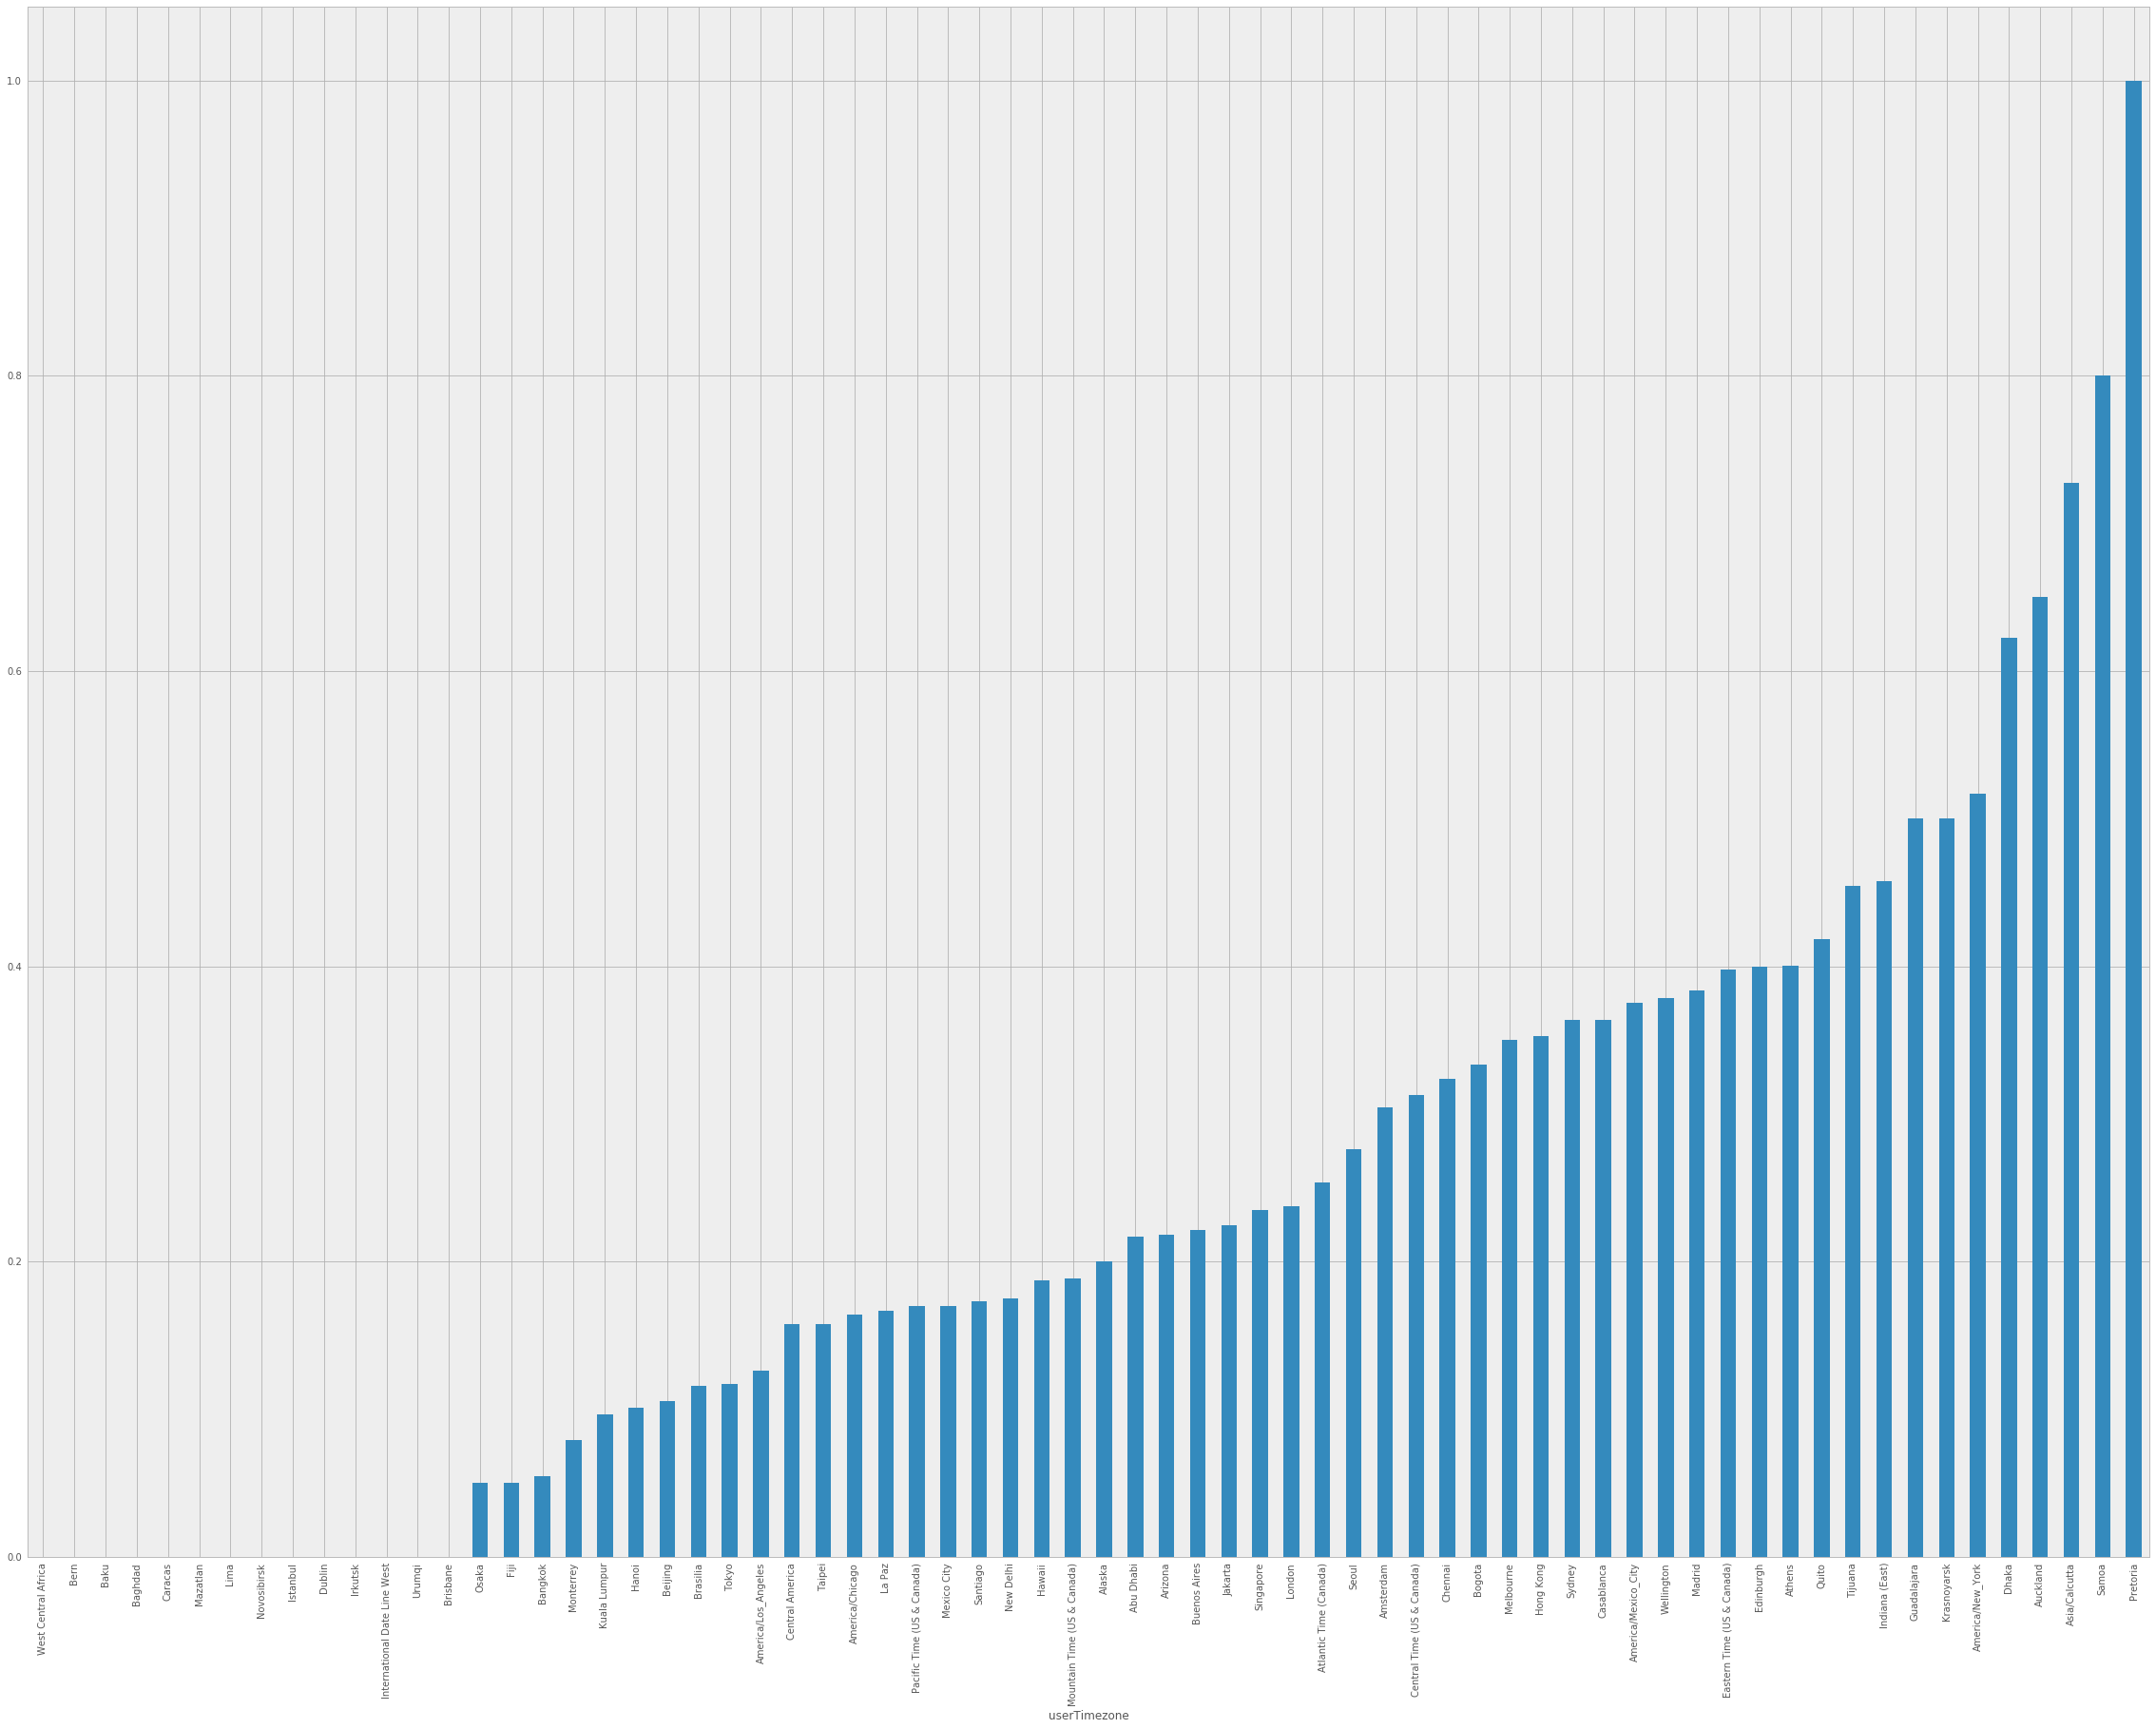

In [56]:
x[u'subjetividade'].mean().sort_values().plot(kind='bar', figsize=(40,30))


# Exibindo uma série temporal com a subjetividade média em todas as time zones

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


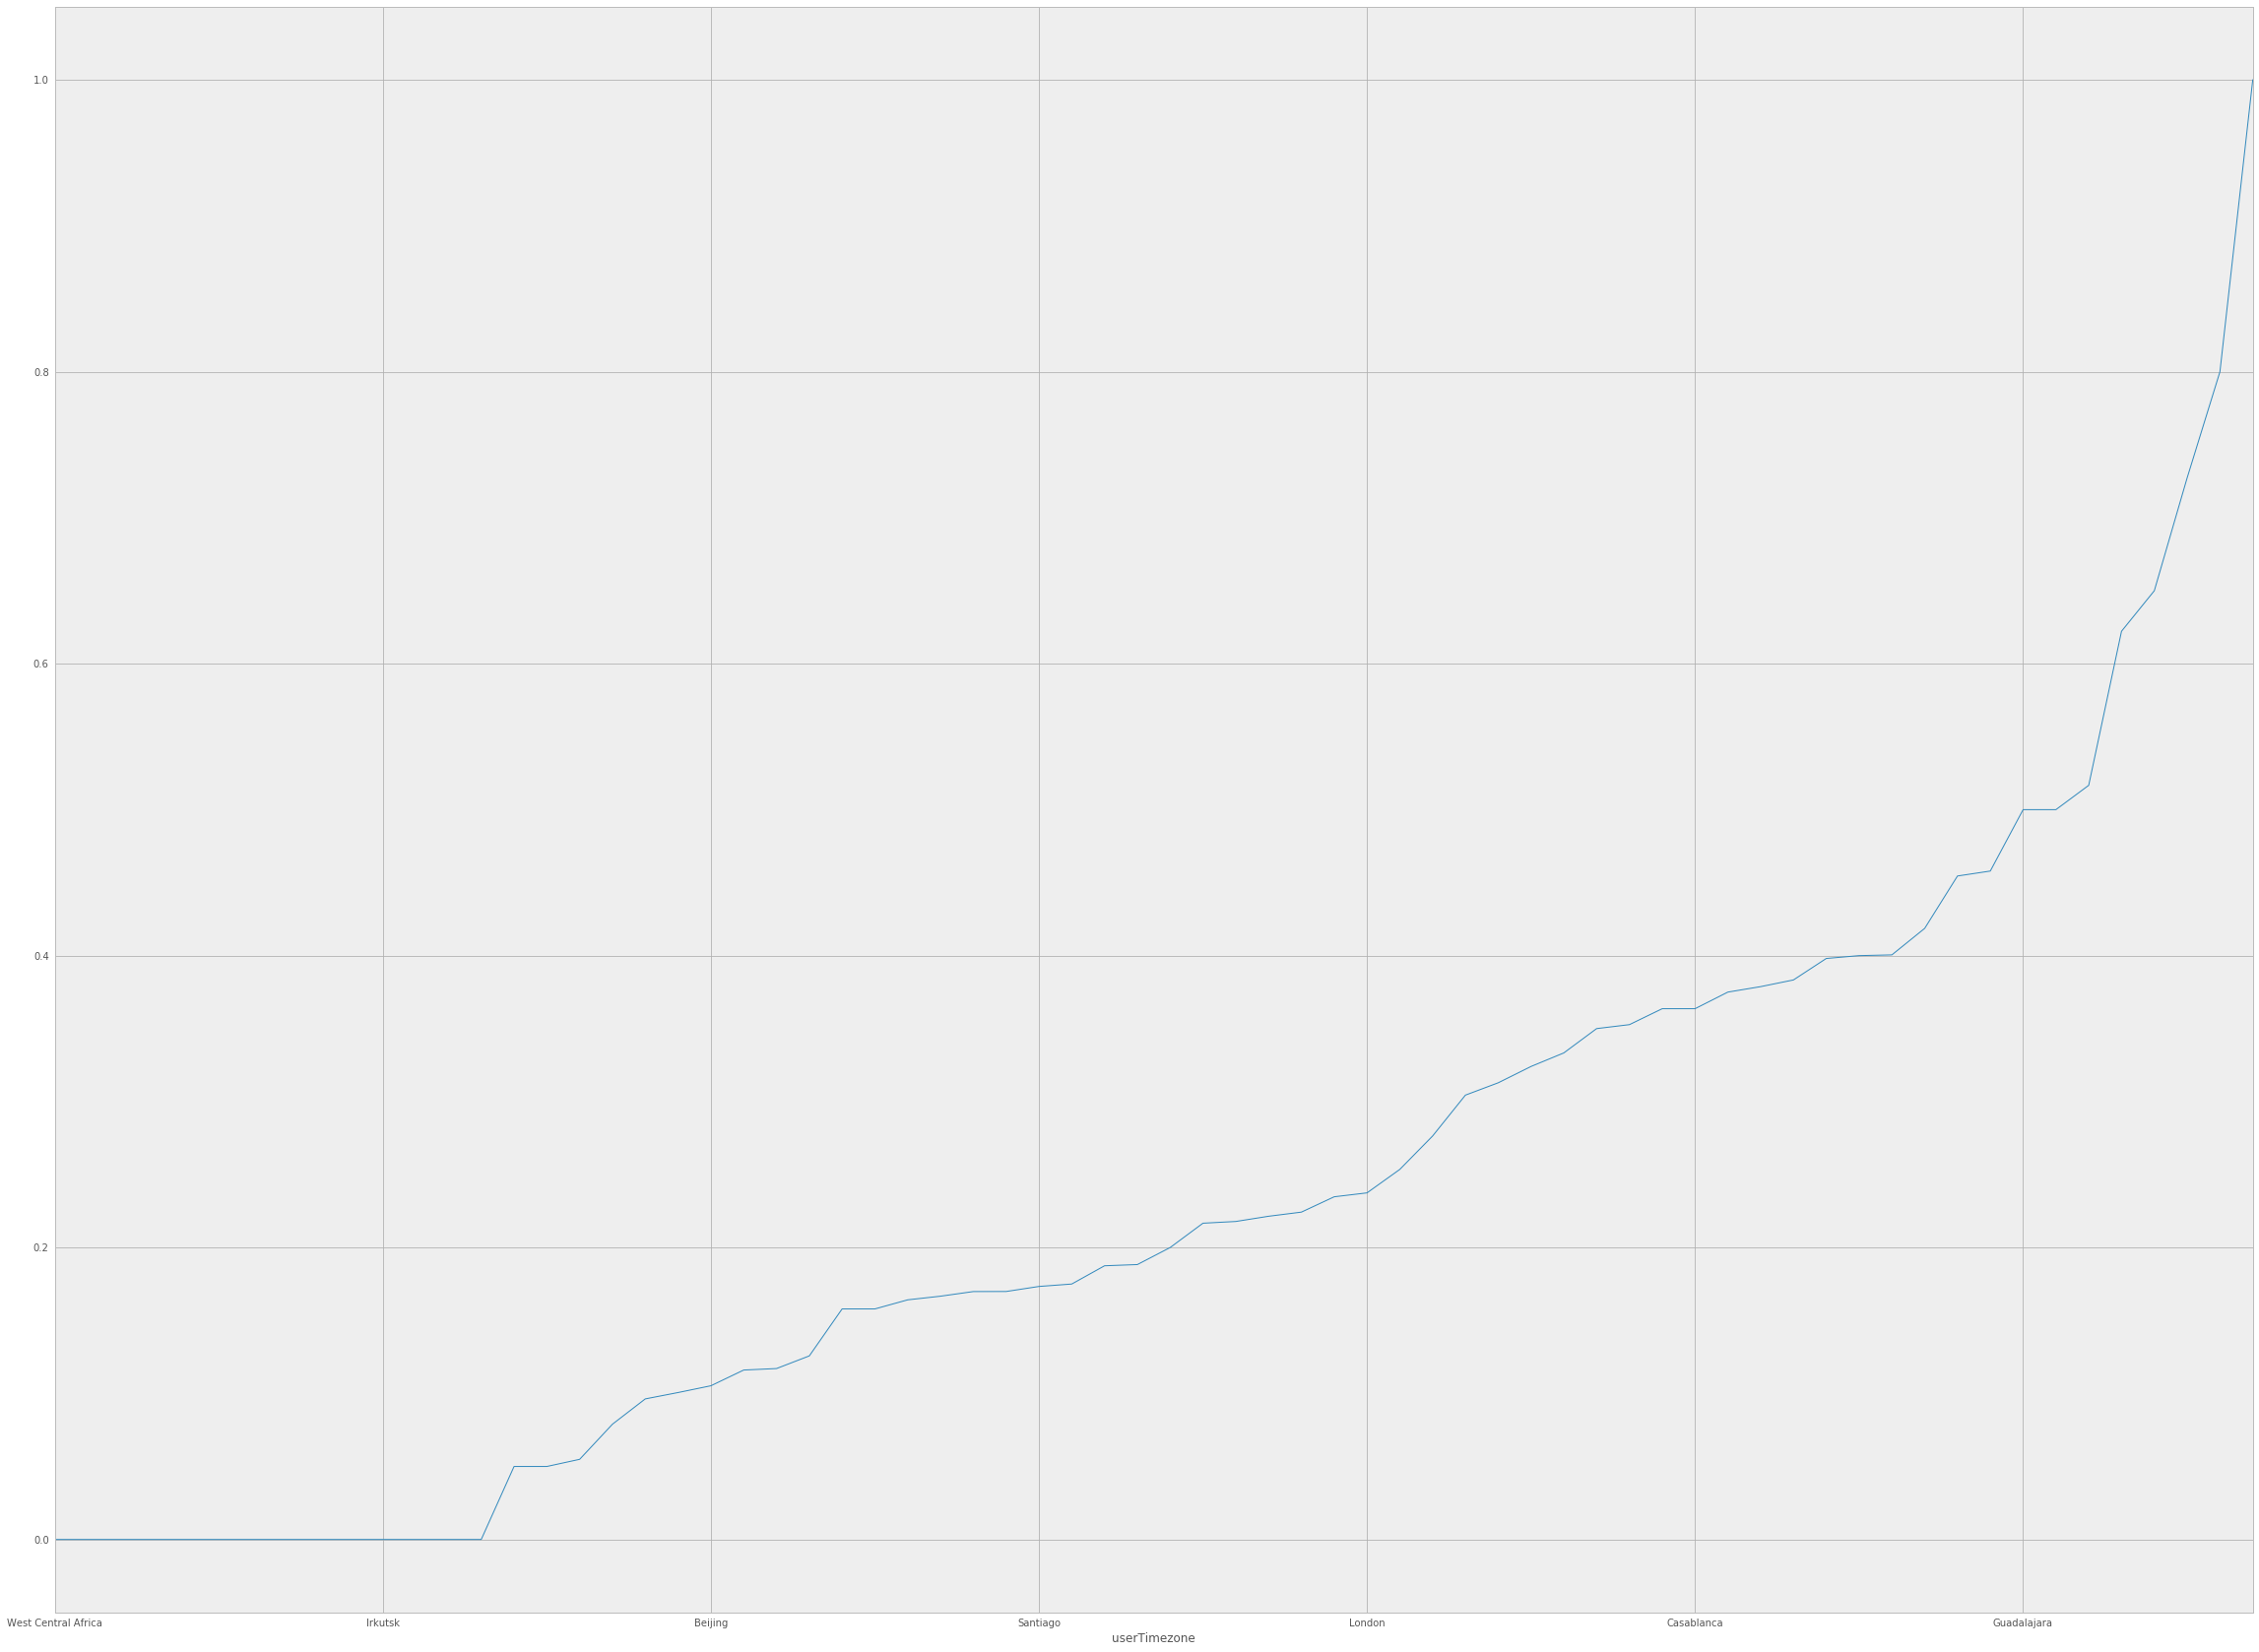

In [58]:
x[u'subjetividade'].mean().sort_values().plot(kind='line', figsize=(40,30))

# Abaixo mostramos onde se concentra a maior parte dos sentimentos,
# como observamos abaixo a maioria se encontra entre 0-25%

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


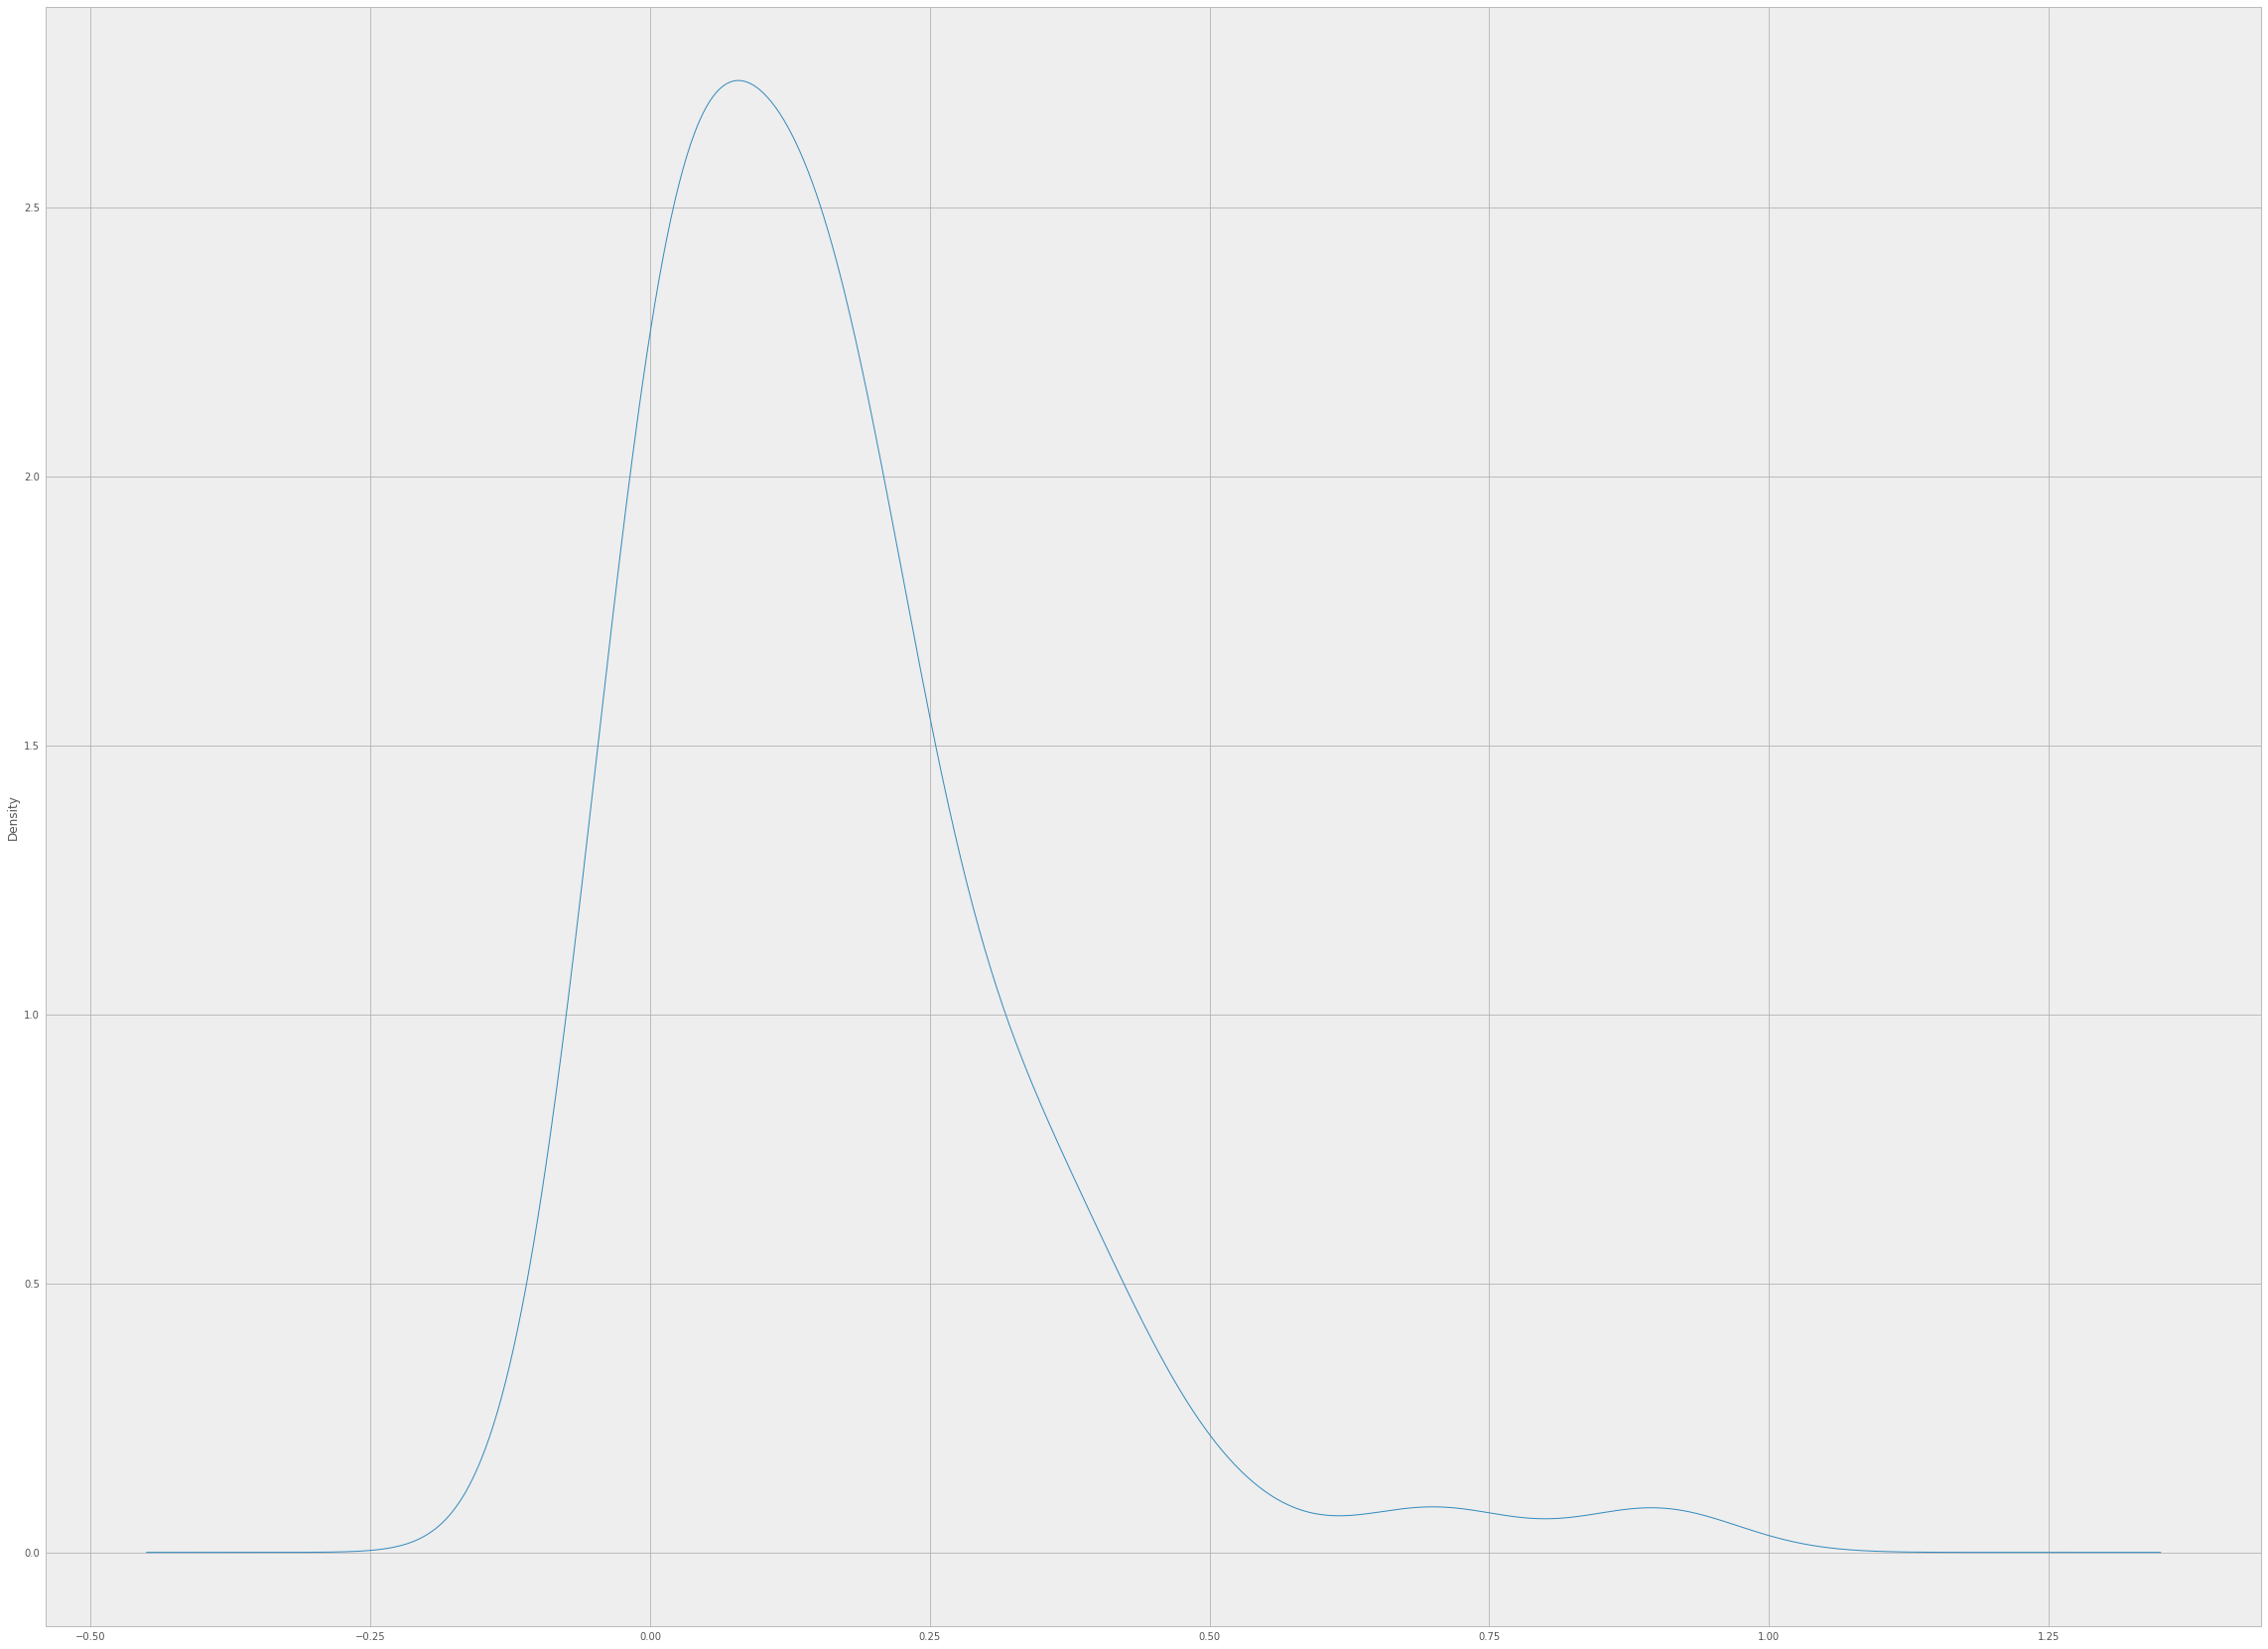

In [65]:
x[u'sentimento'].mean().sort_values().plot(kind='density', figsize=(40,30))

# A mediana dos nossos valores é >0,1 (tracejado vermelho)
# O 1° quartil são valores > 0,1 < ~= 0,23 , o 3° quartil são valores <0,1> ~= 0.03
# O limite inferior ~= 0.43 e limite superior =0
# valores acima dos limites inferior e superior são considerados discrepantes. 
# Para o nosso estudo valores como 0.5, 0.7, 0.9 são considerados discrepantes.

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


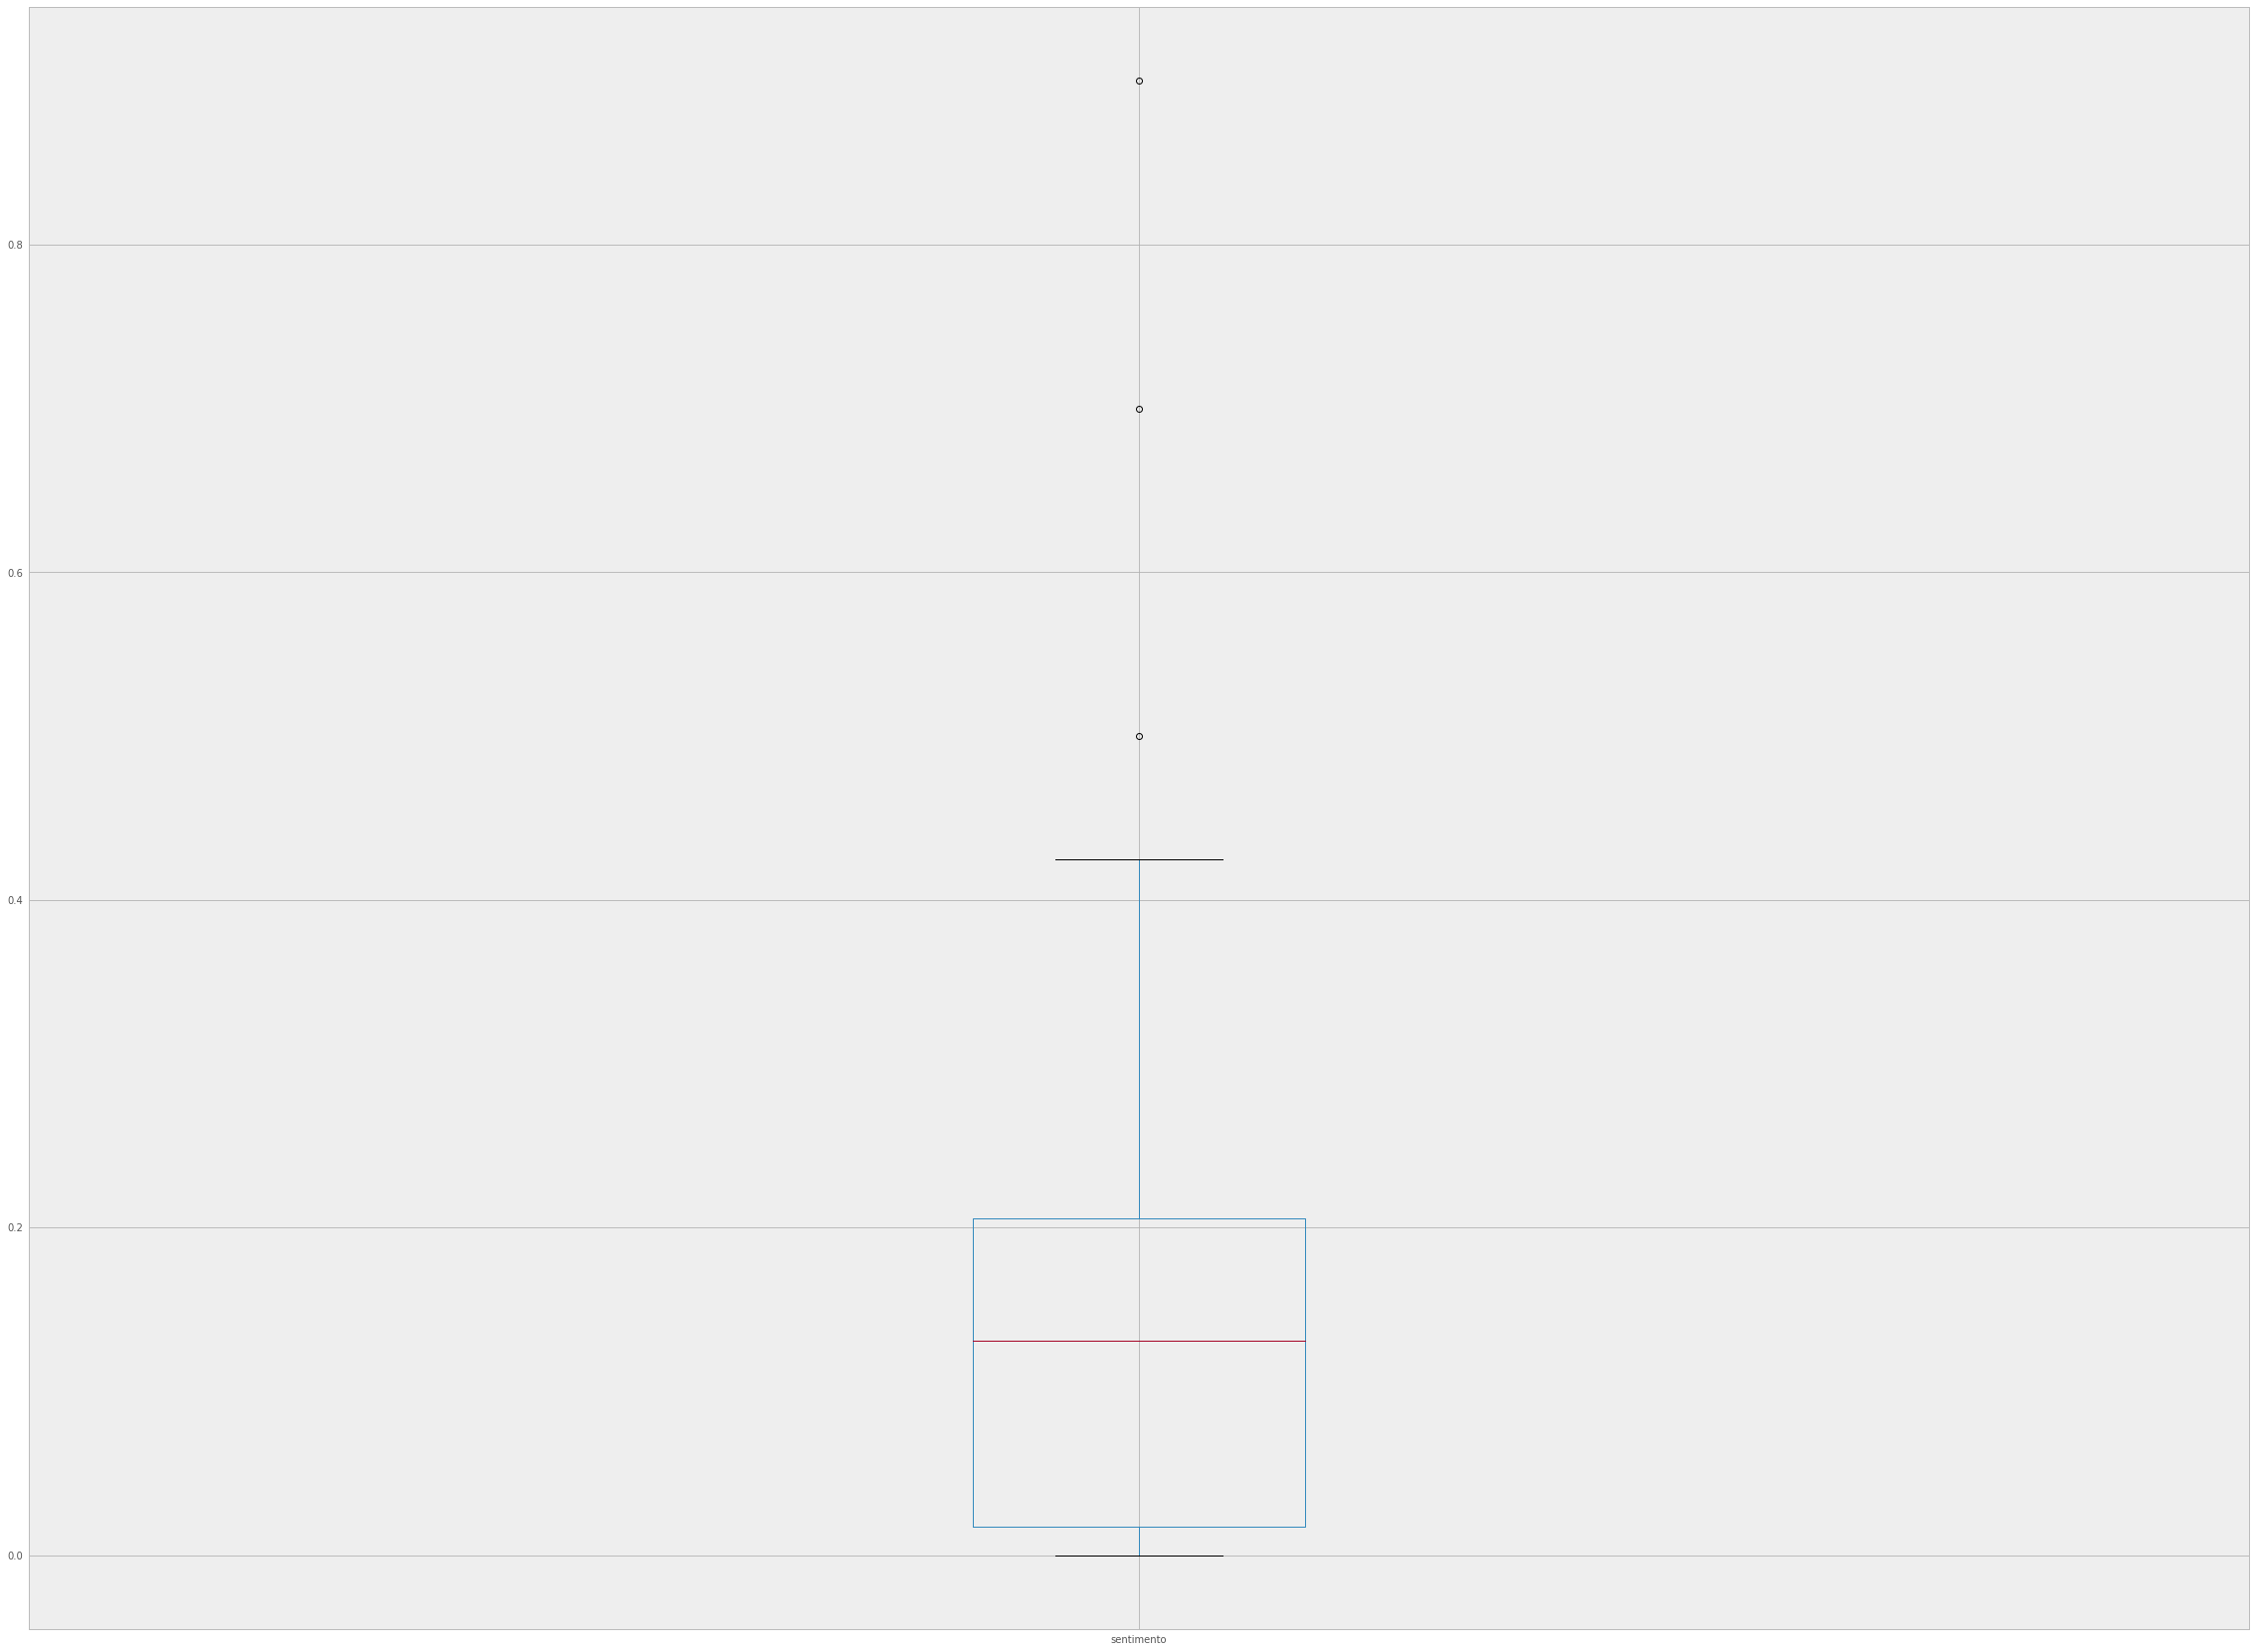

In [67]:
x[u'sentimento'].mean().sort_values().plot(kind='box', figsize=(40,30))

# A mediana dos nossos valores é ~= 0,18 (tracejado vermelho)
# O 1° quartil são valores > 0,18 < ~= 0,35 , o 3° quartil são valores <0,18> ~= 0.07
# O limite inferior = 0.8 e limite superior =0
# valores acima dos limites inferior e superior são considerados discrepantes. 
# Para o nosso estudo valores como 1.0 é considerados discrepantes.

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


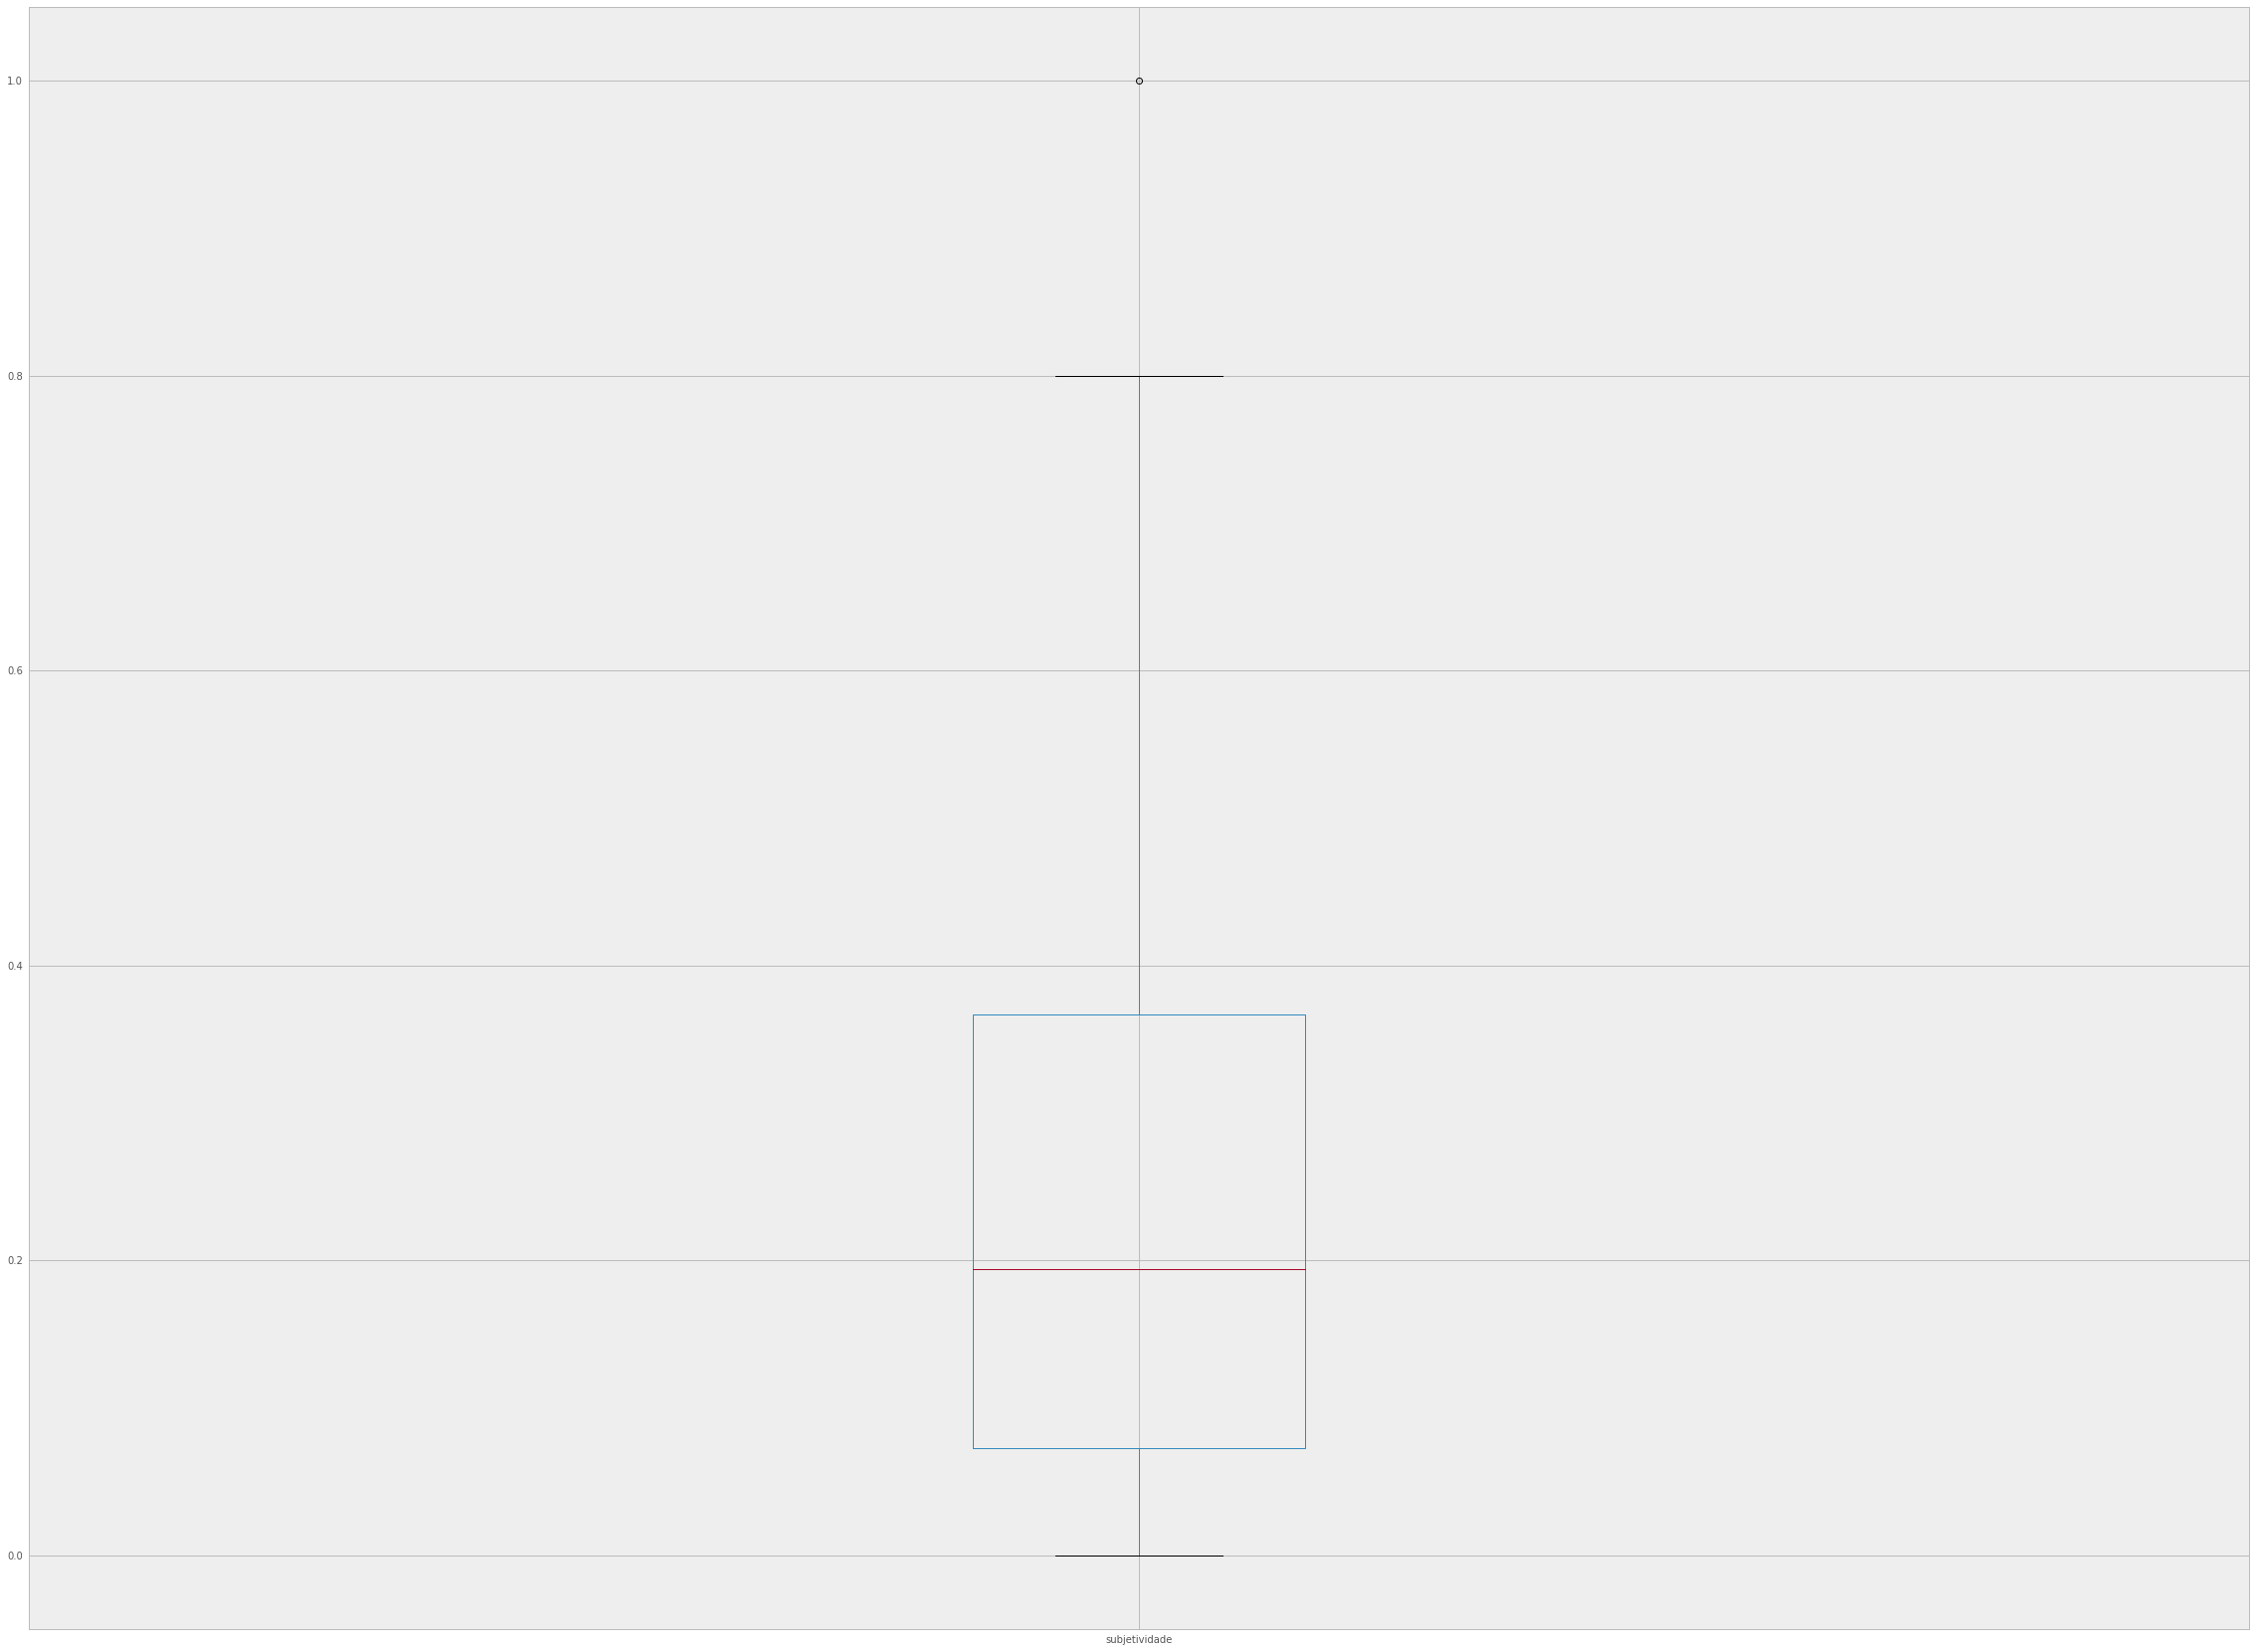

In [69]:
x[u'subjetividade'].mean().sort_values().plot(kind='box', figsize=(40,30))

# Iremos gerar uma nova forma de visualização das informações, para cada time zone vamos pegar a palavra com mais frequência e gerar uma visualização 

In [111]:
word_1 = []
word_2 = [] 
word_3 =[]
word_4 =[]
word_5 =[]
word_6 =[]
word_7 =[]
word_8 =[]
word_9 =[]
word_10 =[]
word_11 =[]
word_12 =[]
word_13 =[]
word_14 =[]
word_15 = []
def palavrasPais(lista):
    if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
        if str(word) not in cached_stop_words:
            lista.append(word) 
            
for i, row in dfThor.iterrows():
    if row['tweetText']: #userTimezone
        for word in str(row['tweetText']).split():
            word = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", word)
            word = re.sub('^u\'','',word)
            word = re.sub('\'','',word)
            word = re.sub(' ','',word)
            word = word.lower()
            if row['userTimezone'] == 'Pacific Time (US & Canada)':
#                 palavrasPais(word_1)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_1.append(word)   
                        freq_palavras1 = Counter(word_1)
                    
            elif row['userTimezone'] == 'Jakarta':
#                 palavrasPais(word_2)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_2.append(word)                
                        freq_palavras2 = Counter(word_2)
                
            elif row['userTimezone'] == 'Bangkok':
#                 palavrasPais(word_3)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_3.append(word)   
                        freq_palavras3 = Counter(word_3)

            elif row['userTimezone'] == 'Hanoi':
#                 palavrasPais(word_4)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_4.append(word)   
                        freq_palavras4 = Counter(word_4)

            elif row['userTimezone'] == 'Eastern Time (US & Canada':
#                 palavrasPais(word_5)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_5.append(word)   
                        freq_palavras5 = Counter(word_5)

            elif row['userTimezone'] == 'Central Time (US & Canada':
#                 palavrasPais(word_6)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_6.append(word)   
                        freq_palavras6 = Counter(word_6)

            elif row['userTimezone'] == 'Mountain Time (US & Canada)':
#                 palavrasPais(word_7)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_7.append(word)   
                        freq_palavras7 = Counter(word_7)

            elif row['userTimezone'] == 'Tokyo':
#                 palavrasPais(word_8)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_8.append(word)   
                        freq_palavras8 = Counter(word_8)

            elif row['userTimezone'] == 'Quito':
#                 palavrasPais(word_9)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_9.append(word)   
                        freq_palavras9 = Counter(word_9)

            elif row['userTimezone'] == 'Mexico City':
#                 palavrasPais(word_10)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_10.append(word)   
                        freq_palavras10 = Counter(word_10)

            elif row['userTimezone'] == 'Atlantic Time (Canada)':
#                 palavrasPais(word_11)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_11.append(word)   
                        freq_palavras11 = Counter(word_11)

            elif row['userTimezone'] == 'Seoul':
#                 palavrasPais(word_12)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_12.append(word)   
                        freq_palavras12 = Counter(word_12)

            elif row['userTimezone'] == 'Arizona':
#                 palavrasPais(word_13)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_13.append(word)   
                        freq_palavras13 = Counter(word_13)

            elif row['userTimezone'] == 'London':
#                 palavrasPais(word_14)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_14.append(word)   
                        freq_palavras14 = Counter(word_14)

            elif row['userTimezone'] == 'Brasilia':
#                 palavrasPais(word_15)
                if len(word) > 3 and len(word) < 18 and word != ' thorragnarok ':
                    if str(word) not in cached_stop_words:
                        word_15.append(word)   
                        freq_palavras15 = Counter(word_15)


# imprime as palavras mais frequentes com suas respectivas frequências
print(freq_palavras1.most_common(3))
print(freq_palavras2.most_common(3))
print(freq_palavras3.most_common(3))
print(freq_palavras4.most_common(3))
print(freq_palavras5.most_common(3))
print(freq_palavras6.most_common(3))
print(freq_palavras7.most_common(3))
print(freq_palavras8.most_common(3))
print(freq_palavras9.most_common(3))
print(freq_palavras10.most_common(3))
print(freq_palavras11.most_common(3))
print(freq_palavras12.most_common(3))
print(freq_palavras13.most_common(3))
print(freq_palavras14.most_common(3))
print(freq_palavras15.most_common(3))

# dfThor.columns

[('marvel', 58), ('thorki', 39), ('tickets', 38)]
[('tickets', 27), ('marvel', 23), ('movie', 17)]
[('thorki', 28), ('marvel', 24), ('hela', 14)]
[('thorki', 20), ('marvel', 13), ('hela', 10)]
[('marvel', 58), ('thorki', 39), ('tickets', 38)]
[('marvel', 58), ('thorki', 39), ('tickets', 38)]
[('hulk', 5), ('thor', 4), ('exclusive', 3)]
[('studios', 4), ('tickets', 4), ('world', 3)]
[('movie', 3), ('poster', 2), ('funny', 2)]
[('loki', 10), ('marvel', 5), ('miedo', 3)]
[('marvel', 3), ('movie', 2), ('going', 2)]
[('gonna', 3), ('good', 3), ('story', 3)]
[('tickets', 4), ('still', 2), ('look', 2)]
[('good', 2), ('movies', 2), ('marvel', 2)]
[('gostei', 2), ('filme', 2), ('thor', 2)]


135